### test whether the output of each kernel is Gaussian or not

In [2]:
import os
import sys
sys.path.append(os.getcwd())
import torch
import argparse
from model.deeplab import *
from tqdm import tqdm
import json
from utils.metrics import Evaluator
from data import spacenet
from common import config
from torch.utils.data import DataLoader
import numpy as np
import cv2
import torchvision
import matplotlib.pyplot as plt
import torch.nn
from model.sync_batchnorm.batchnorm import SynchronizedBatchNorm2d
import pdb
from tensorboardX import SummaryWriter

In [3]:
domain = "Shanghai"
model_n = "Vegas"

In [4]:
model_path = '/home/home1/xw176/work/Domain_Adaptation/configs/mobilenet.baseline/xh.deeplab.mobilenet.' + model_n.lower() + '.n/train_log/best.pth'
cuda = False

model = DeepLab(num_classes=2,
        backbone=config.backbone,
        output_stride=config.out_stride,
        sync_bn=config.sync_bn,
        freeze_bn=True)
if cuda:
    checkpoint = torch.load(model_path)
else:
    checkpoint = torch.load(model_path, map_location=torch.device('cpu'))
    
model.load_state_dict(checkpoint)

# evaluator = Evaluator(2)
if cuda:
    model = model.cuda()
    
model.eval();

In [5]:
image_set = spacenet.Spacenet(city=domain, split='test', img_root=config.img_root)
image_loader = DataLoader(image_set, batch_size=config.batch_size, shuffle=False, num_workers=2, drop_last=True)

Found 646 test images


In [6]:
bn_num = 0

In [7]:
def extract_features(module, input):
    b, c, h, w = input[0].shape
#     index = np.arange(5)
#     feature = input[0][:, index, :, :].permute(1,0,2,3)
#     feature = feature.reshape(5, -1)
#     fig, axs = plt.subplots(1, 5, figsize = (20, 2))
#     for i in range(5):
#             axs[i].hist(feature[i], bins = 200, density = 1)

    feature = input[0].permute(1,0,2,3)
    feature = feature.reshape(c, -1)
    fig, axs = plt.subplots(int(np.ceil(c/5)),5, figsize = (20,15))
    f_num = 0
    for i in range(int(np.ceil(c/5))):
        for j in range(5):
            axs[i][j].hist(feature[f_num], bins = 200, density = 1)
            f_num += 1
            if f_num == c:
                break
    
    global bn_num
    print(bn_num)
    bn_num += 1
    plt.show()

In [8]:
for h in model.modules():
    if isinstance(h, SynchronizedBatchNorm2d) or isinstance(h, nn.BatchNorm2d):
        h.register_forward_pre_hook(extract_features)

#### M: shanghai -- D: shanghai

/home/home1/xw176/work/Program_file/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


0


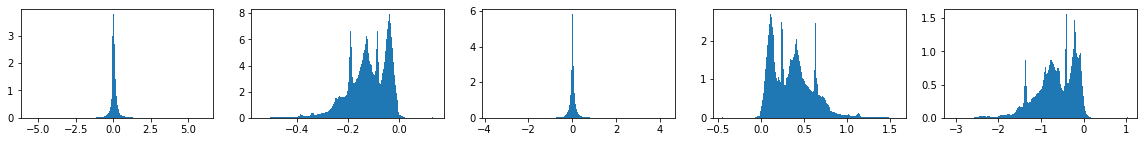

1


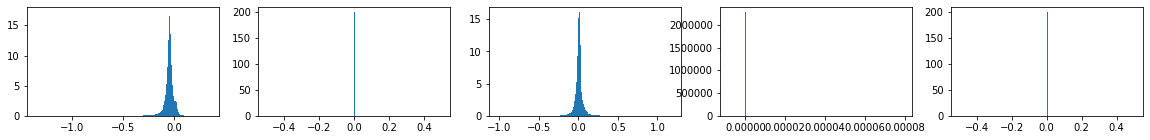

2


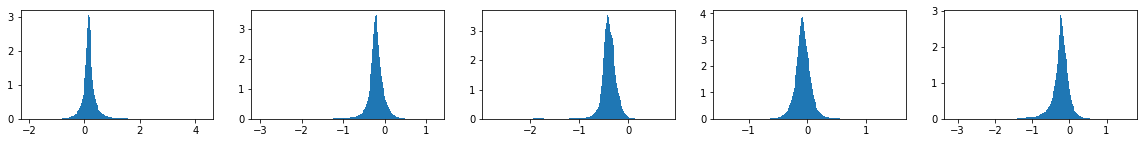

3


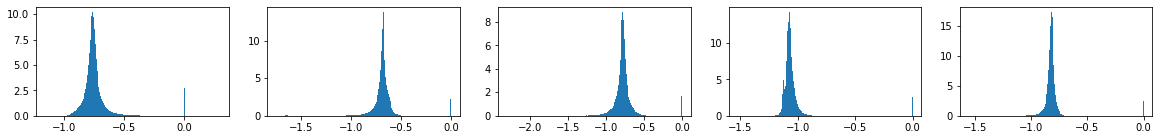

4


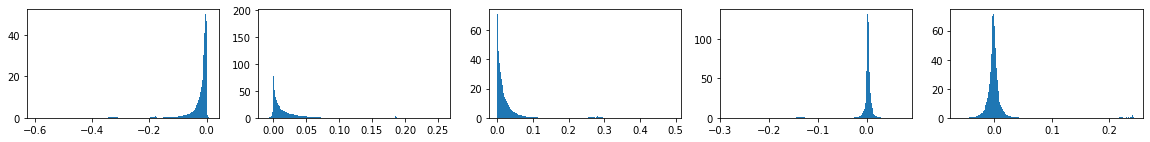

5


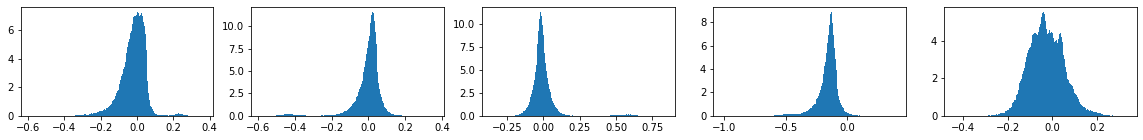

6


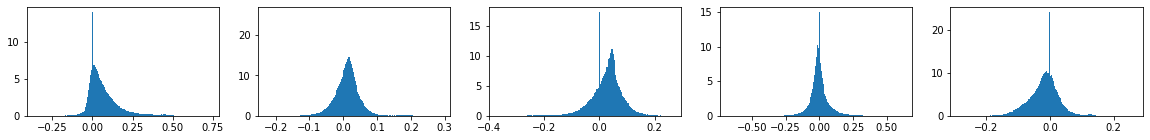

7


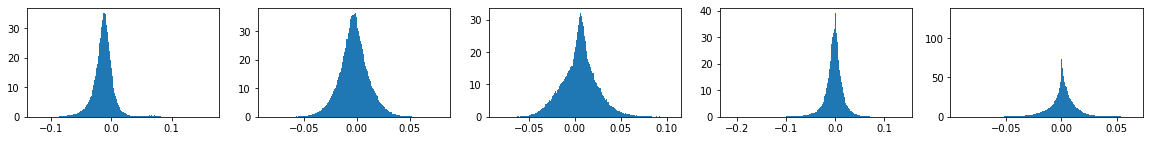

8


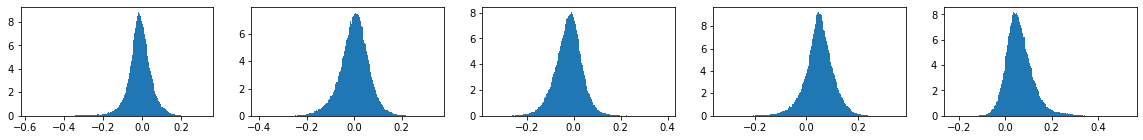

9


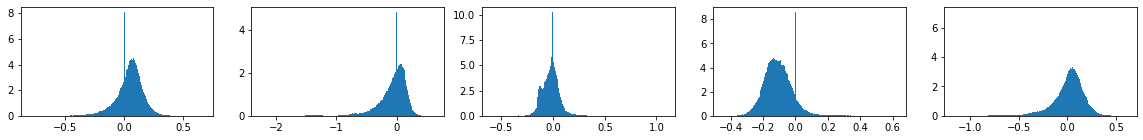

10


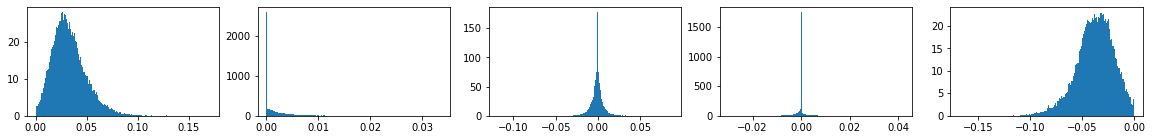

11


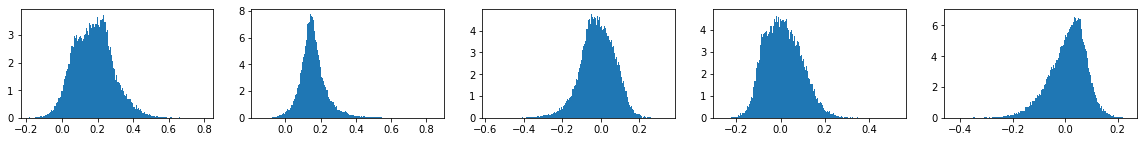

12


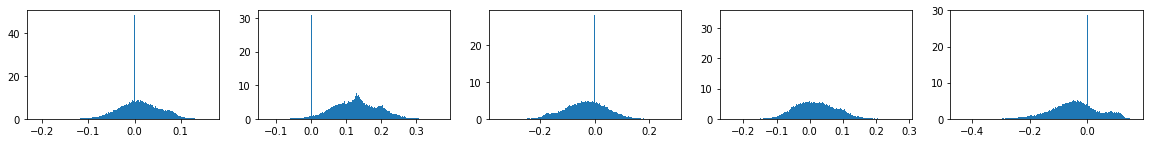

13


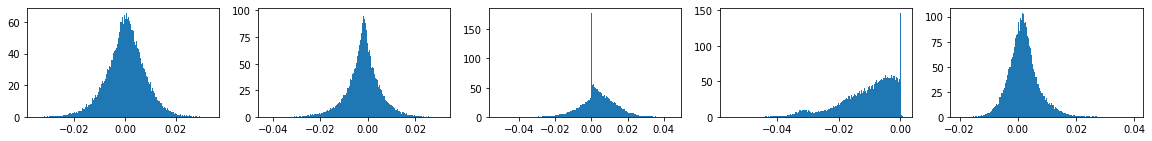

14


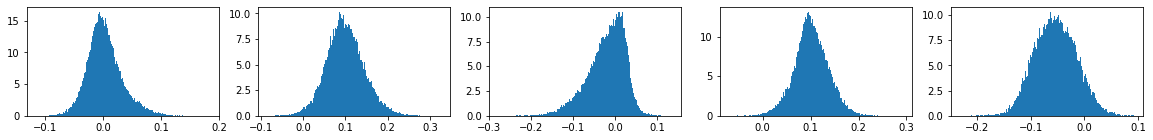

15


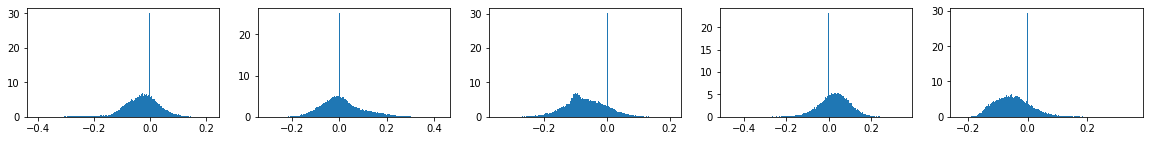

16


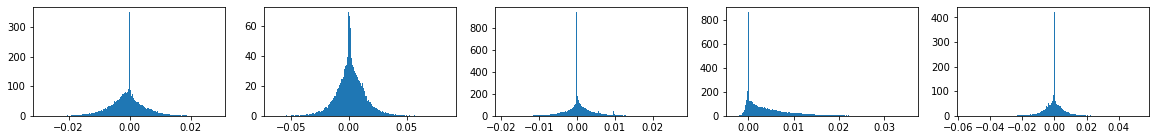

17


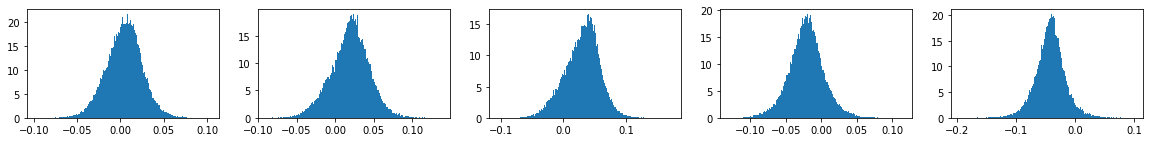

18


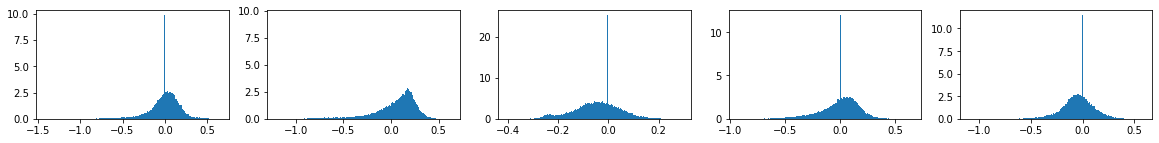

19


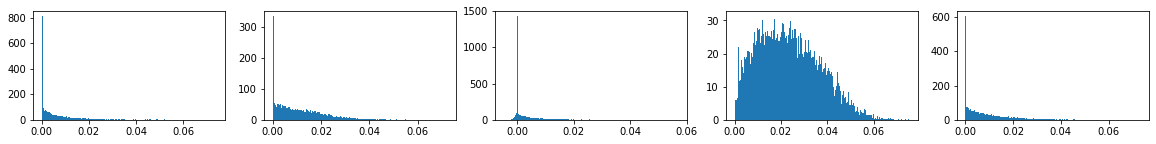

20


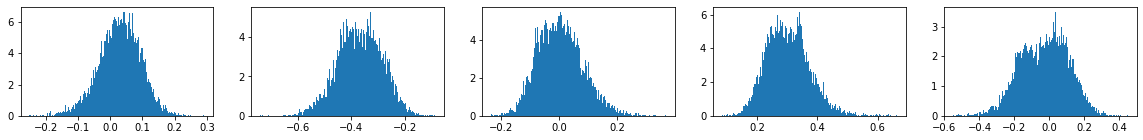

21


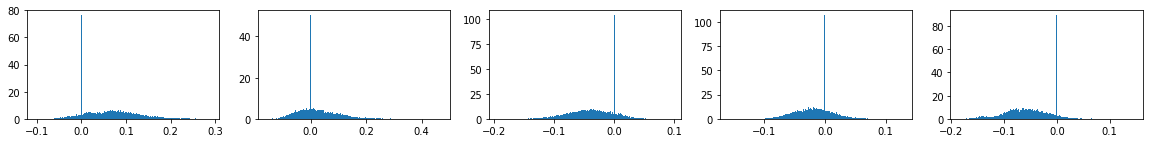

22


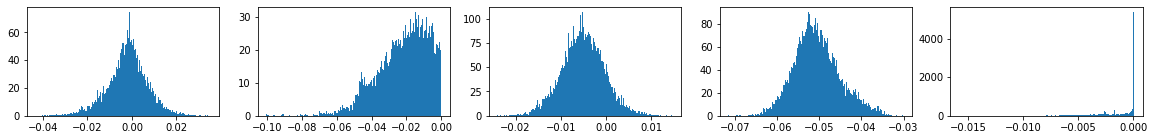

23


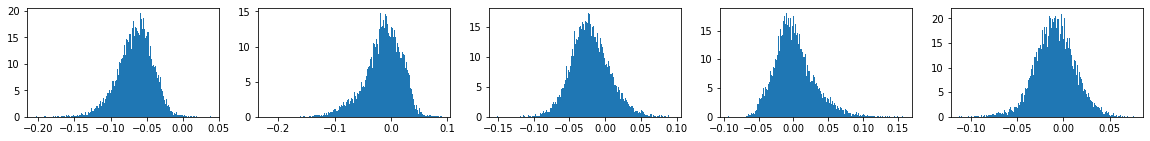

24


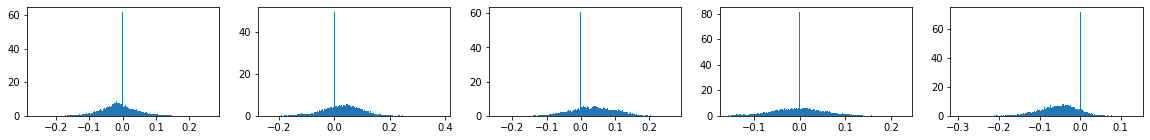

25


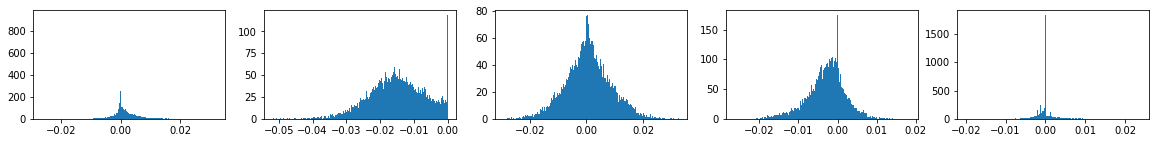

26


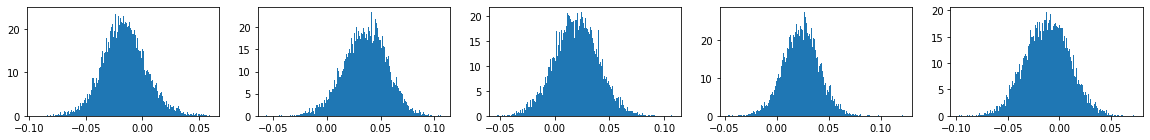

27


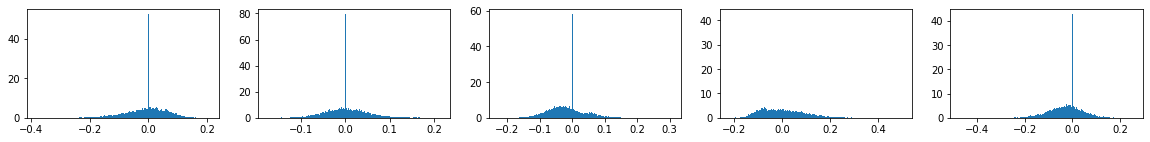

28


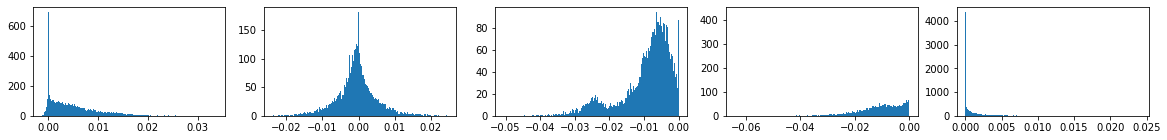

29


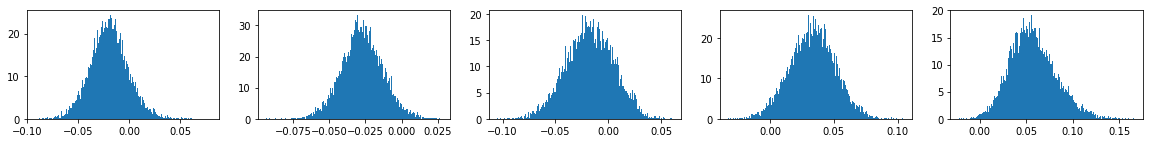

30


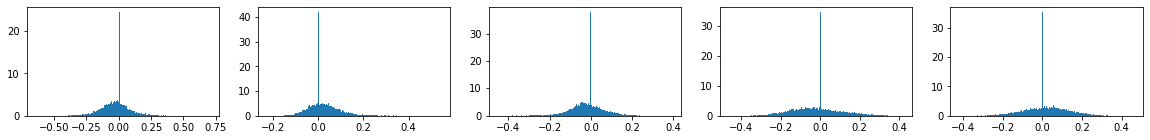

31


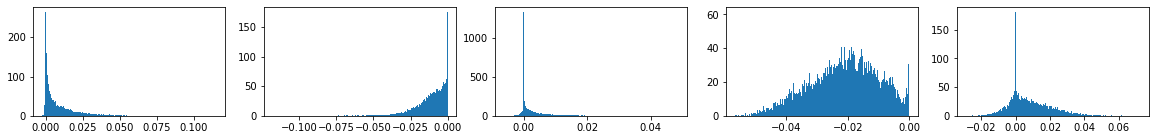

32


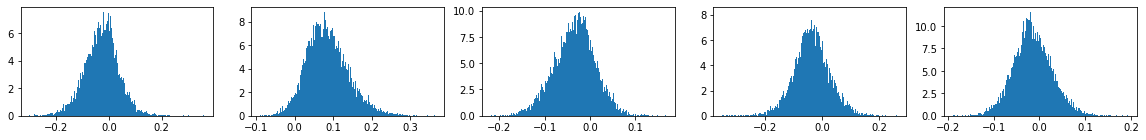

33


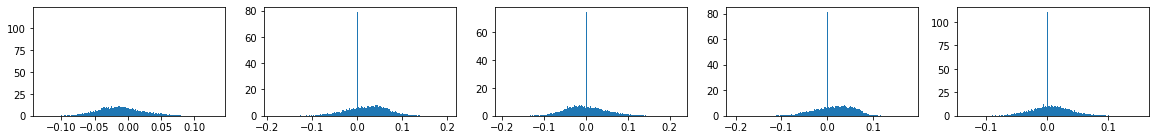

34


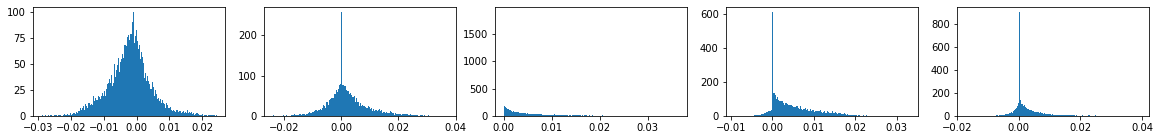

35


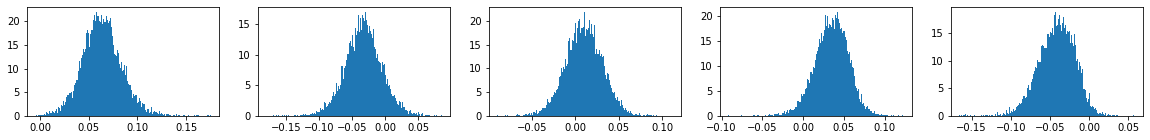

36


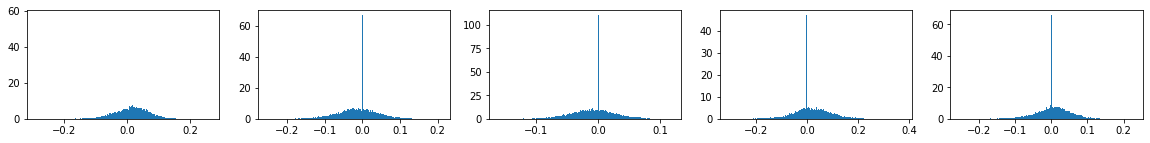

37


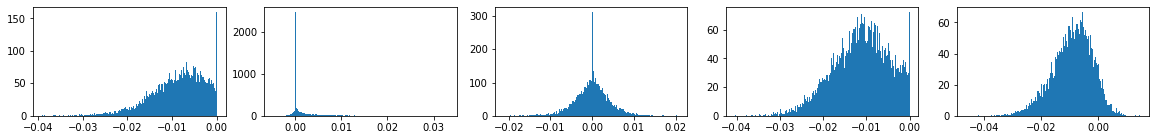

38


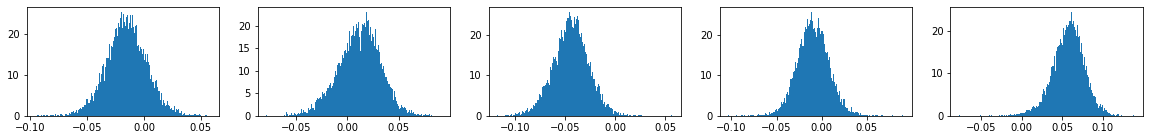

39


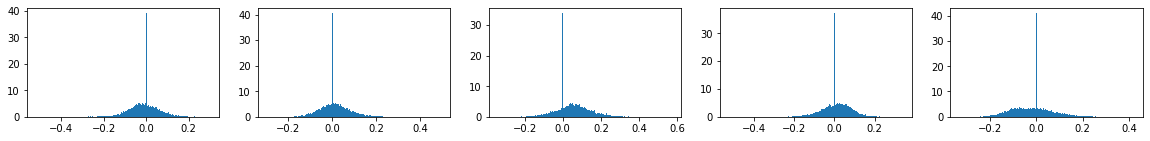

40


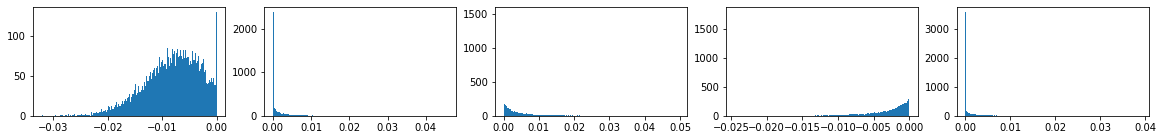

41


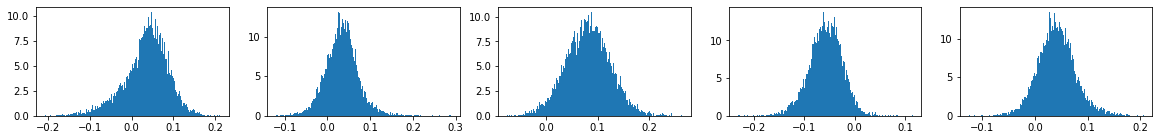

42


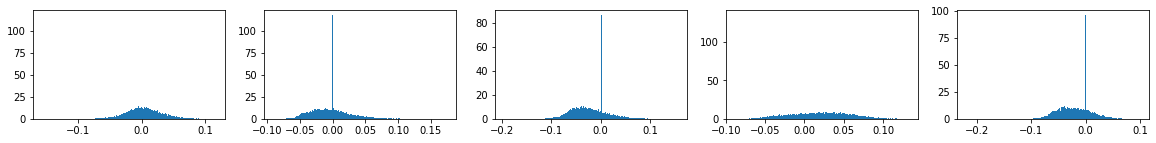

43


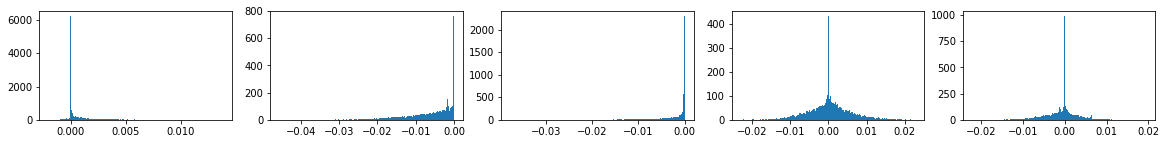

44


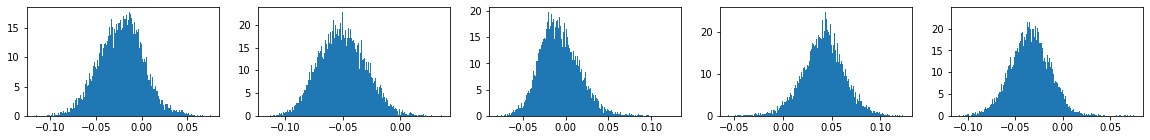

45


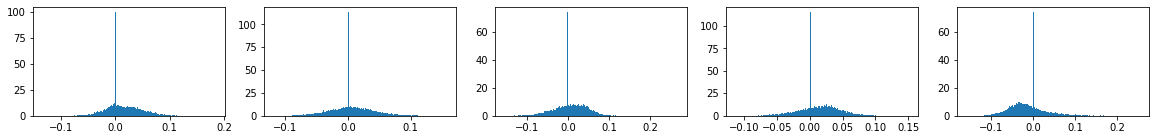

46


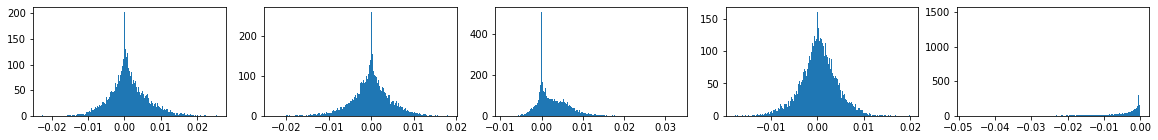

47


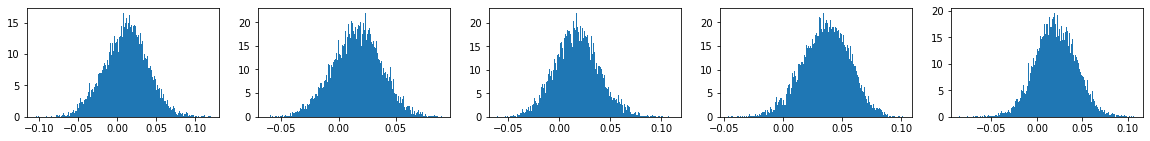

48


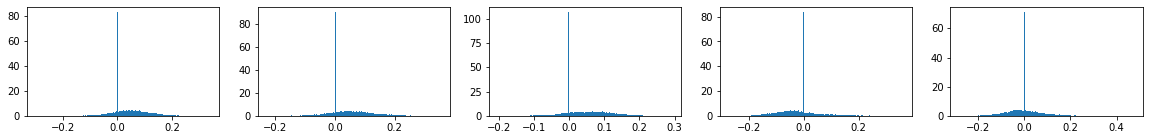

49


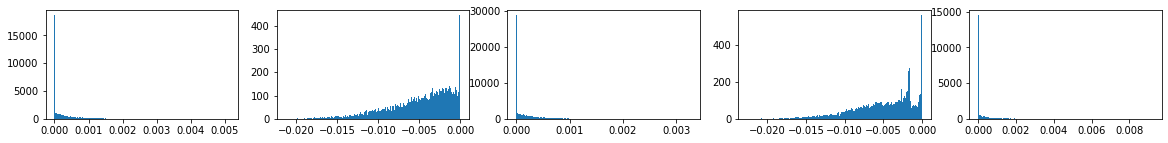

50


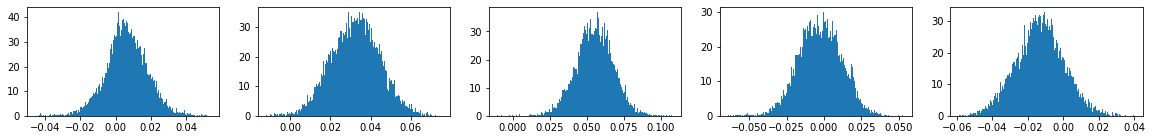

51


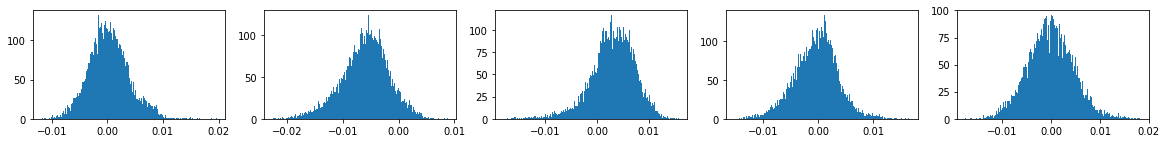

52


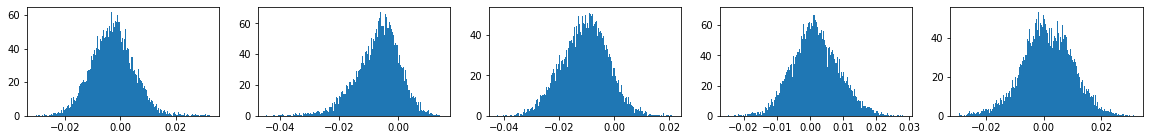

53


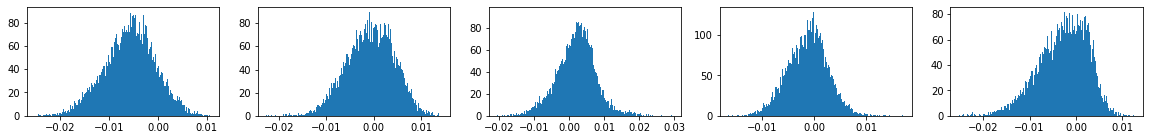

54


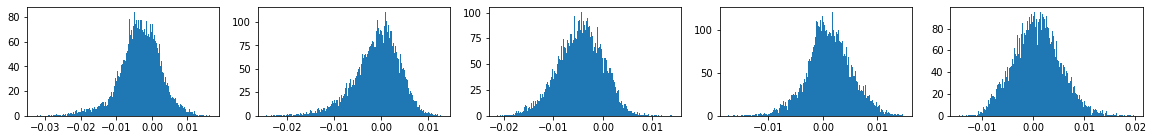

55


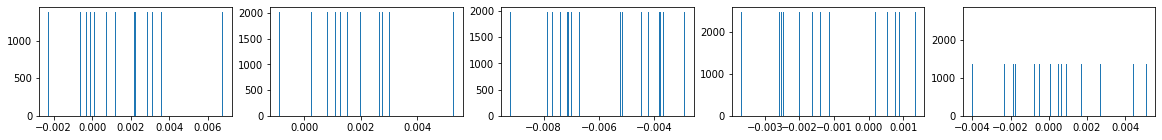

56


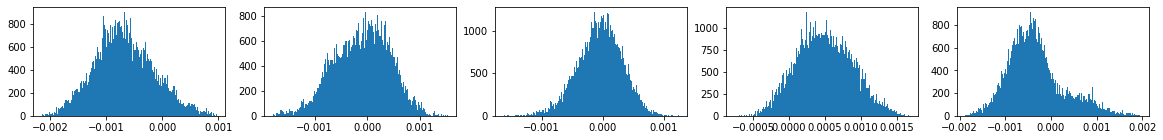

57


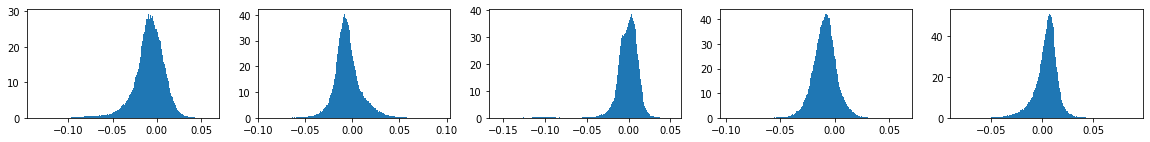

58


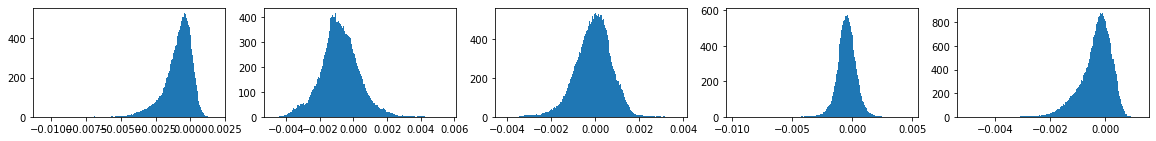

59


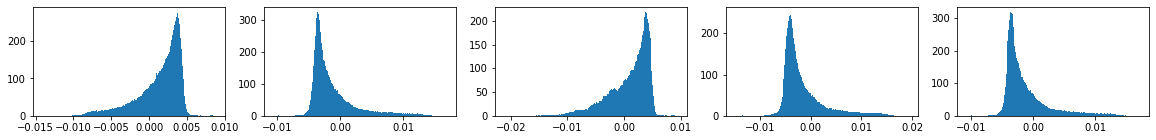

In [8]:
for sample in image_loader:
    image, target = sample['image'], sample['label']
    if cuda:
        image, target = image.cuda(), target.cuda()
    with torch.no_grad():
        output = model(image)
    break

#### M: Vegas -- D:Vegas

/home/home1/xw176/work/Program_file/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


0


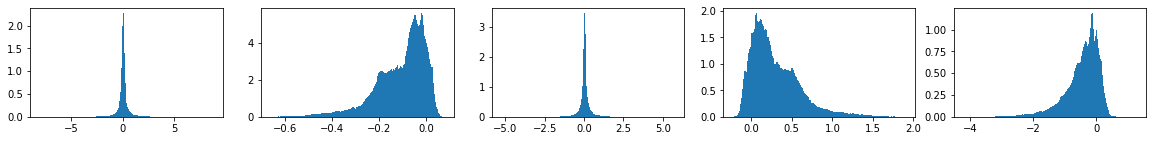

1


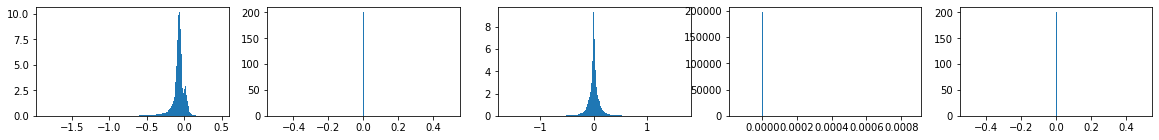

2


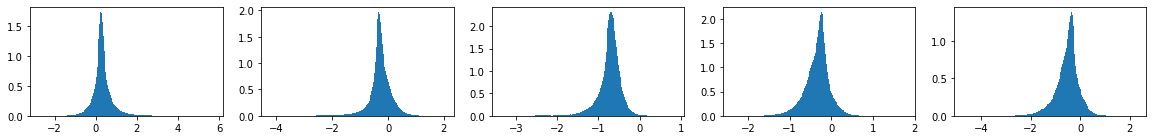

3


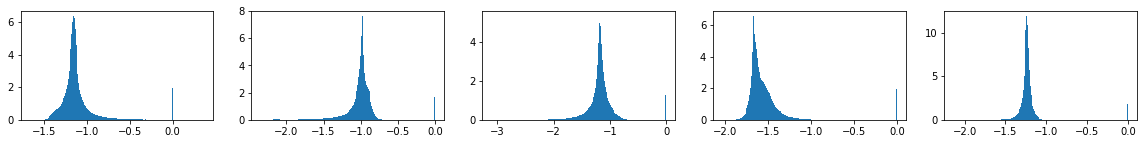

4


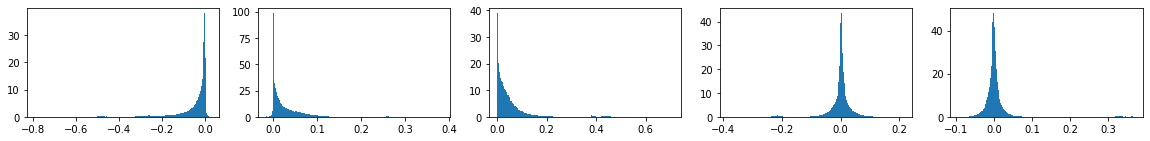

5


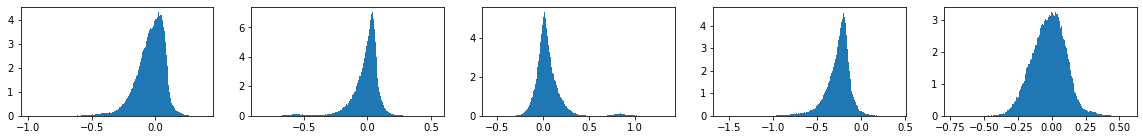

6


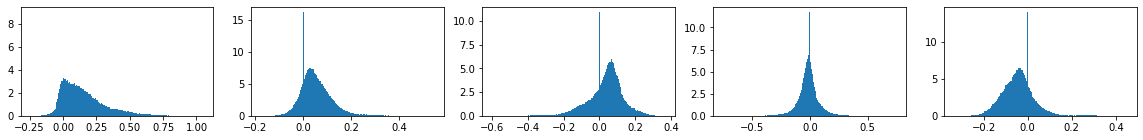

7


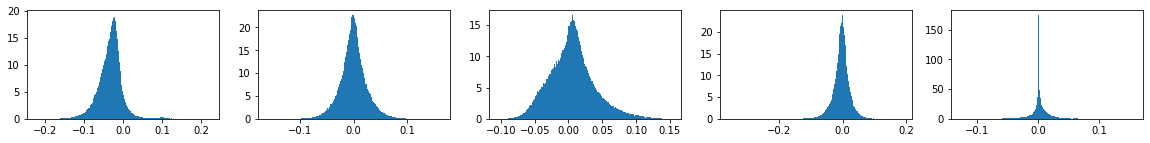

8


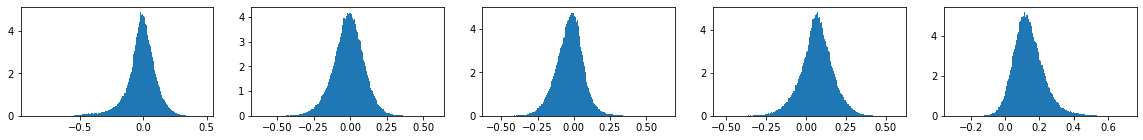

9


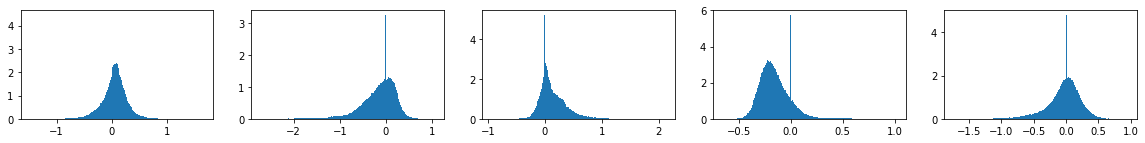

10


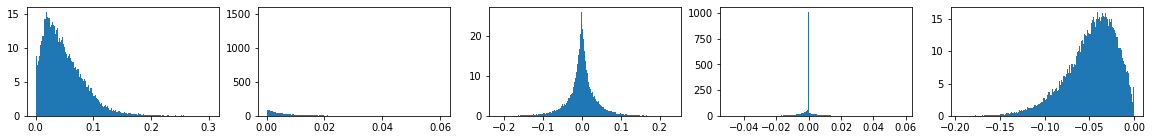

11


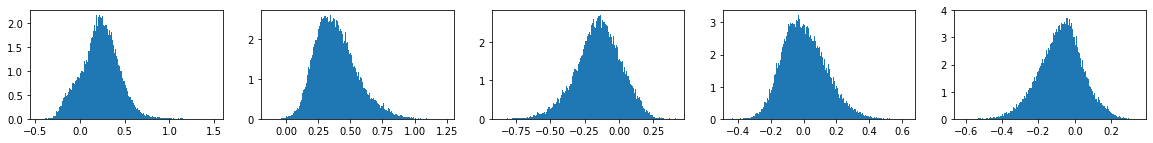

12


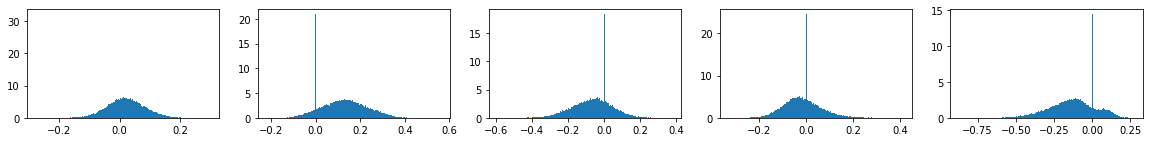

13


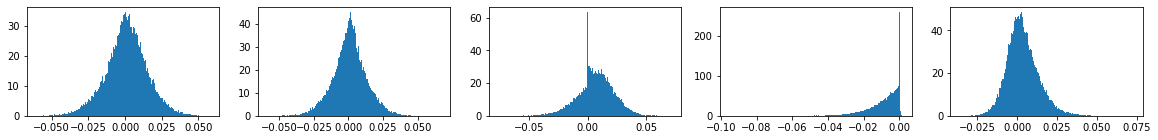

14


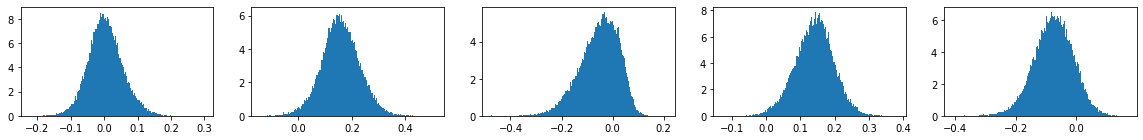

15


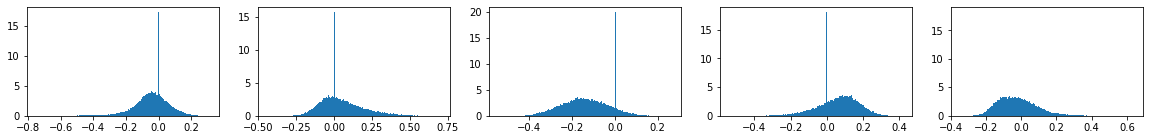

16


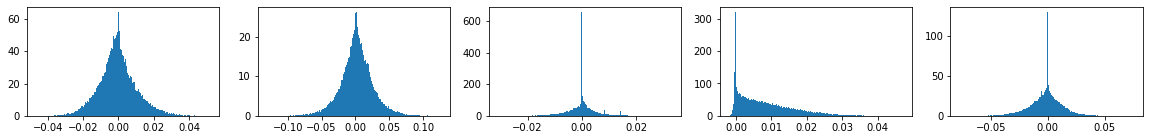

17


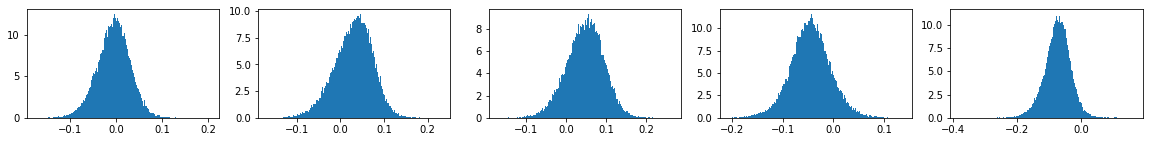

18


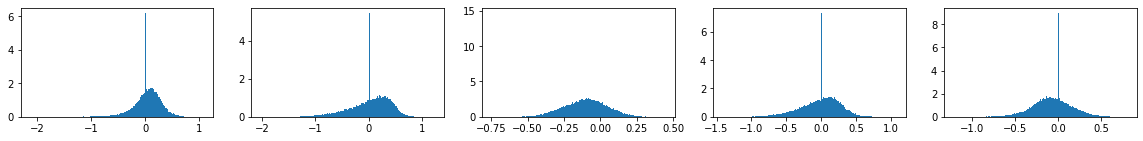

19


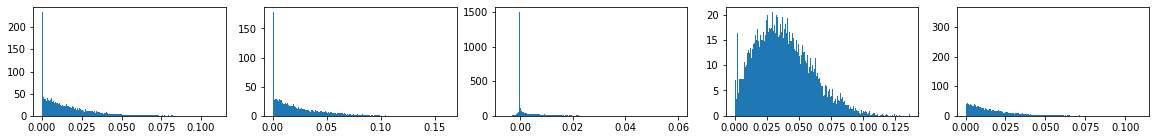

20


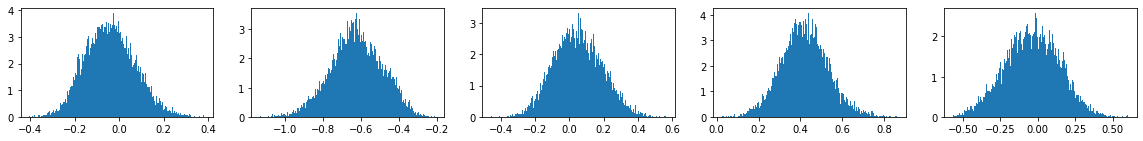

21


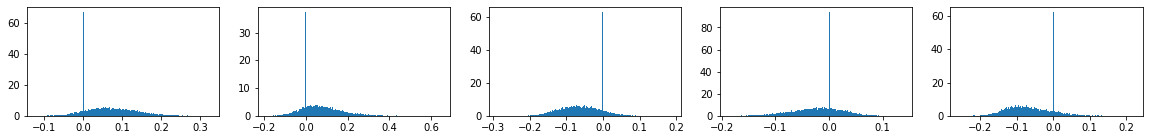

22


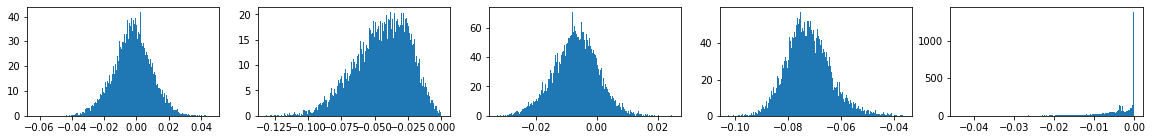

23


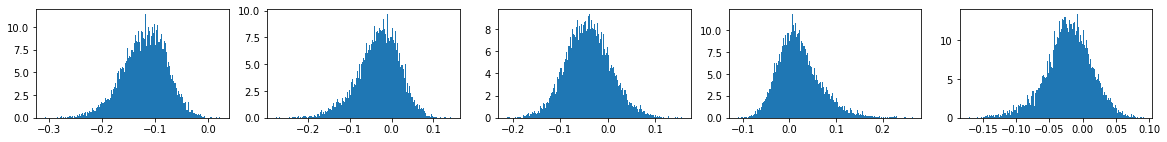

24


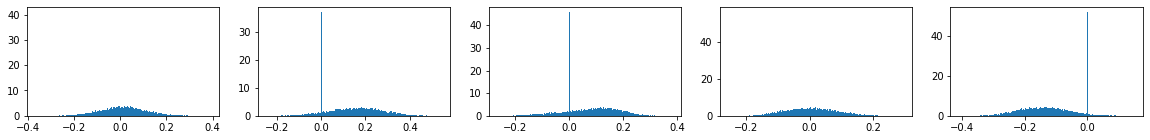

25


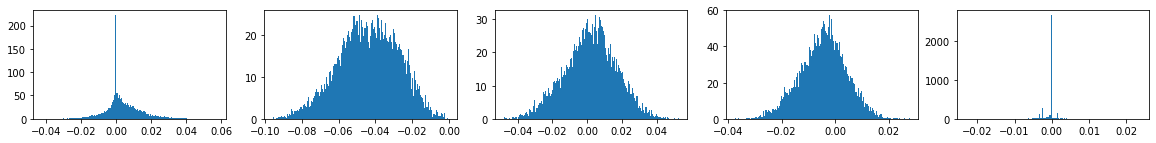

26


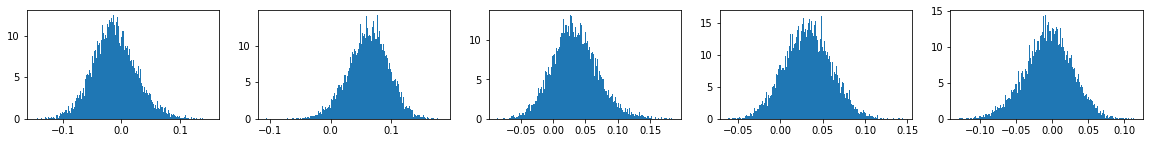

27


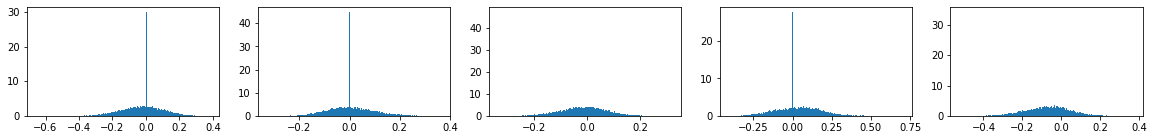

28


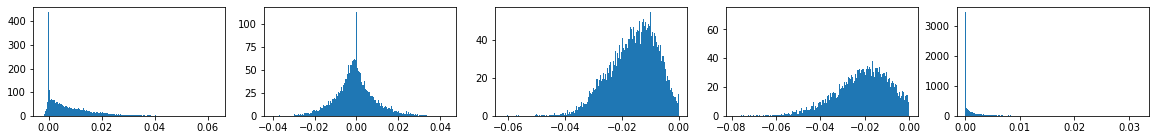

29


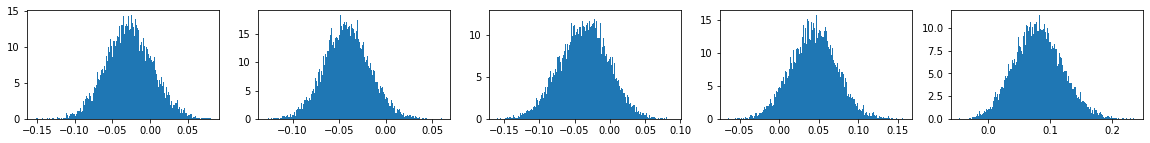

30


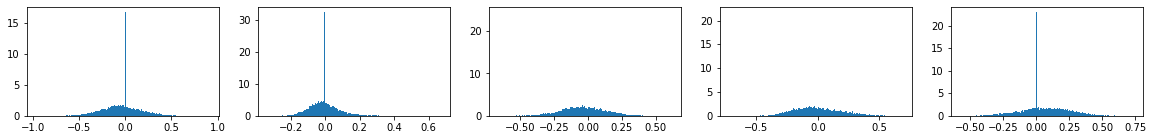

31


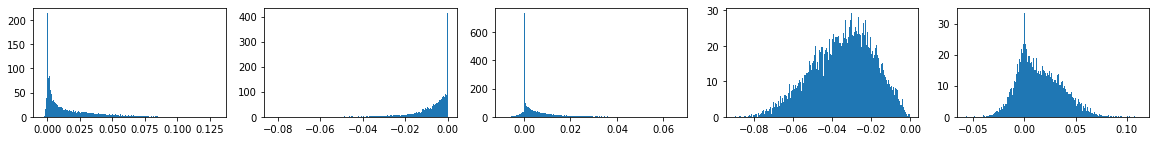

32


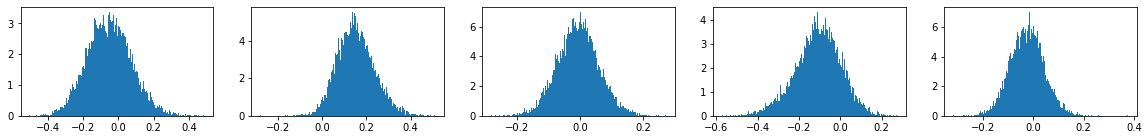

33


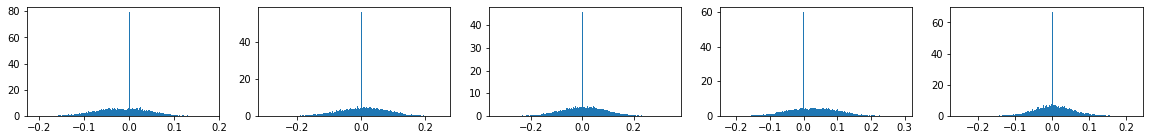

34


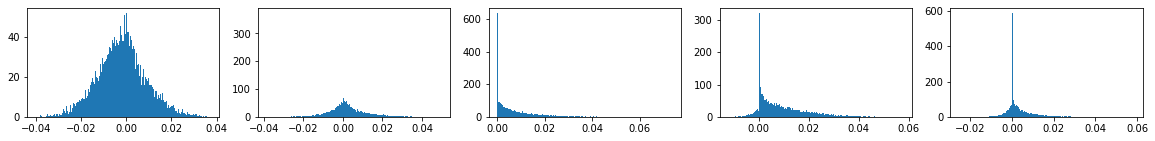

35


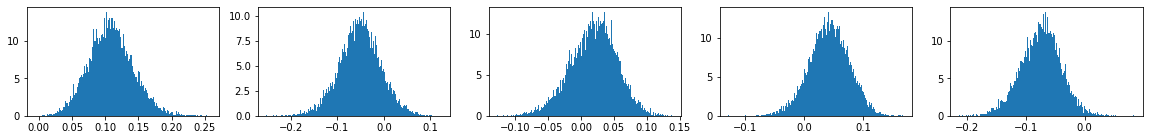

36


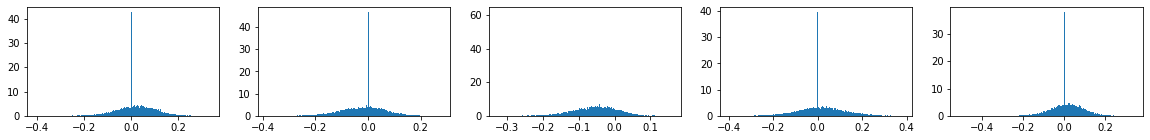

37


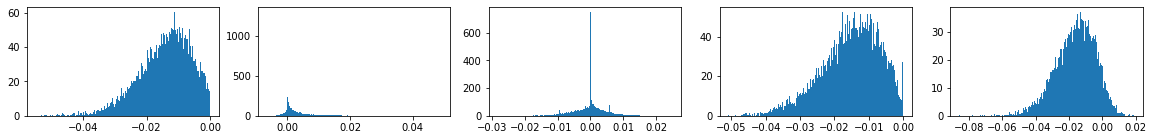

38


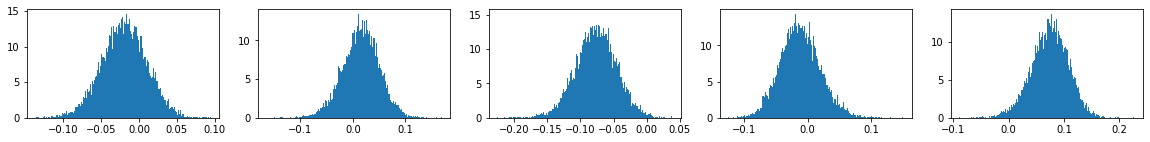

39


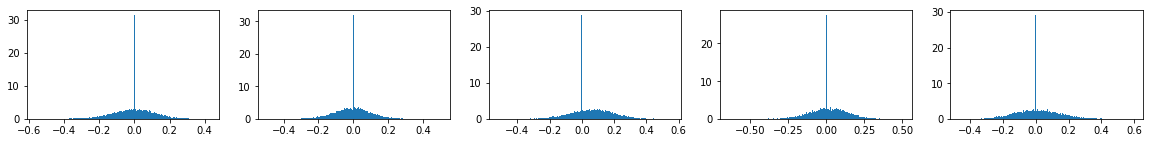

40


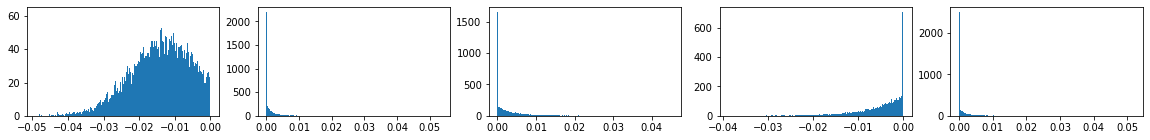

41


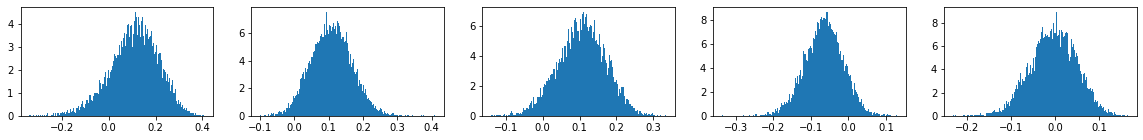

42


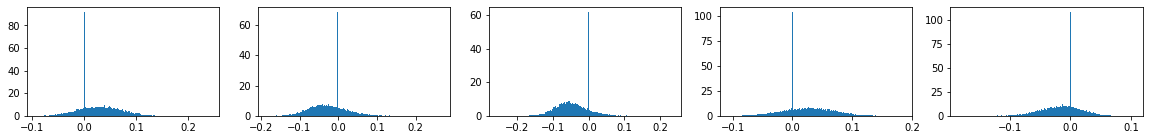

43


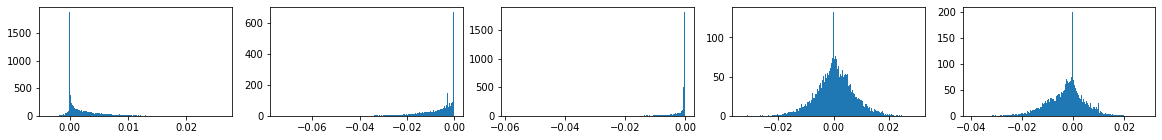

44


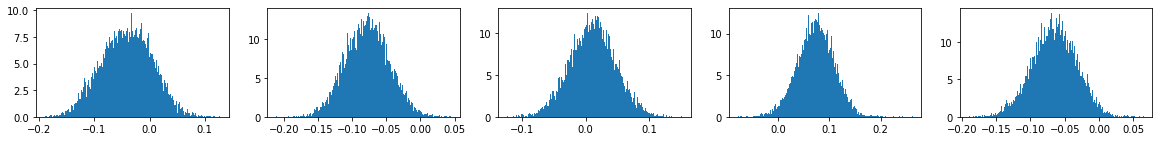

45


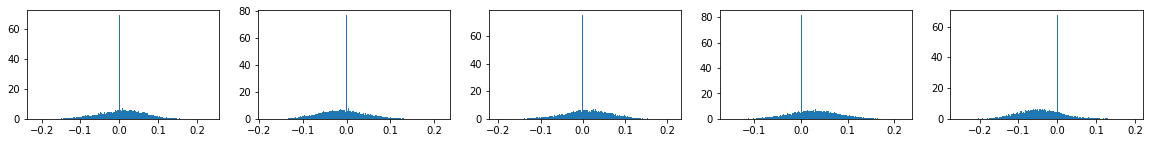

46


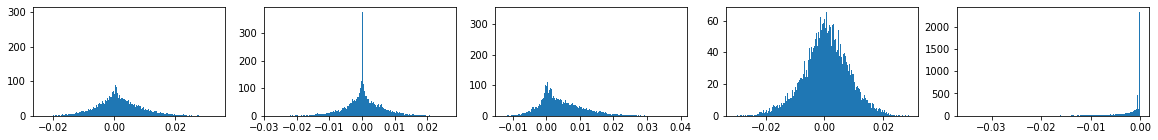

47


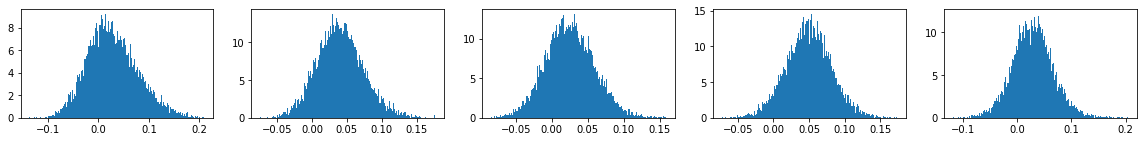

48


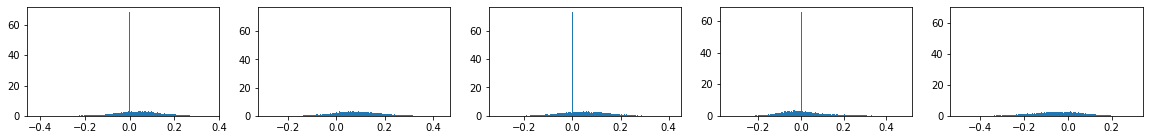

49


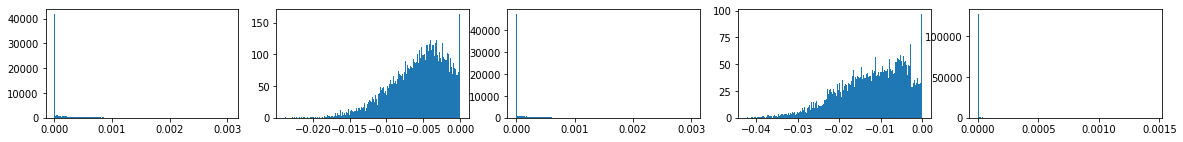

50


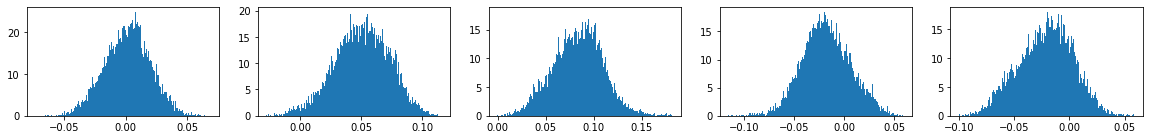

51


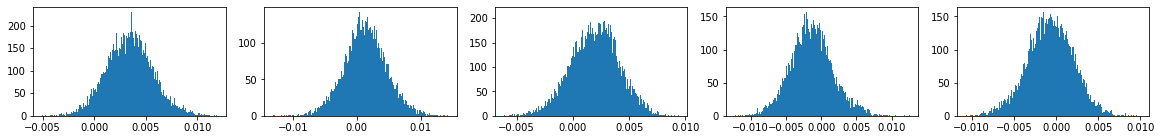

52


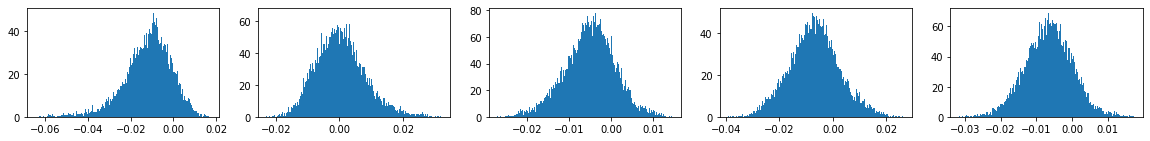

53


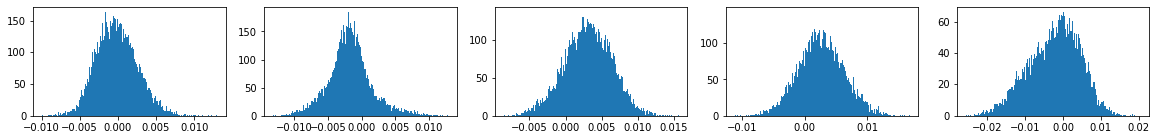

54


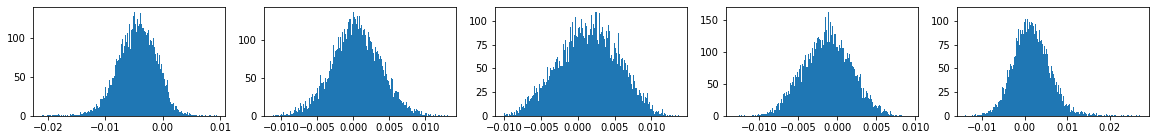

55


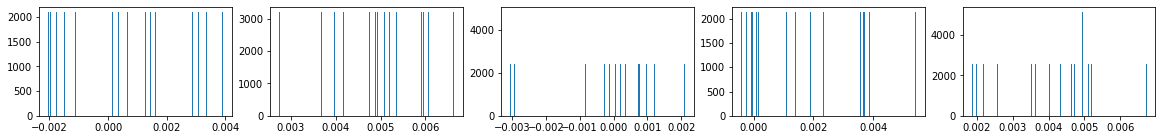

56


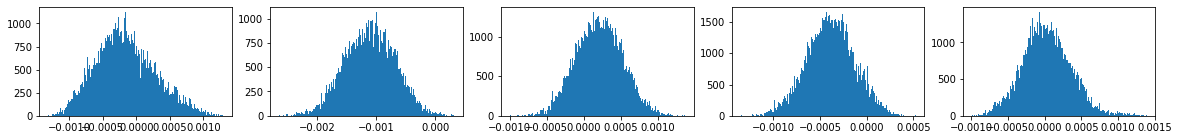

57


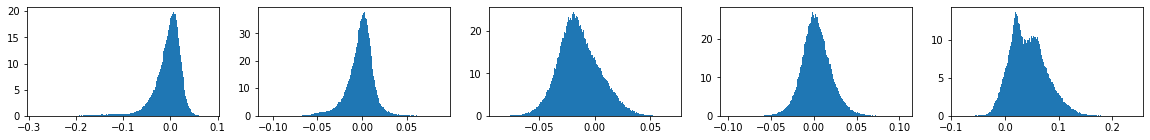

58


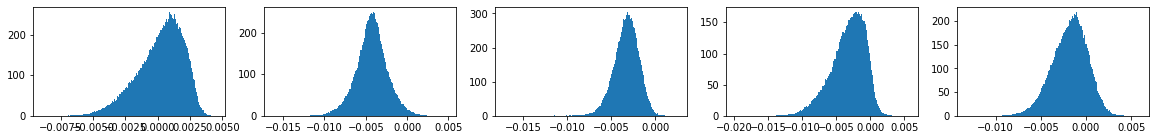

59


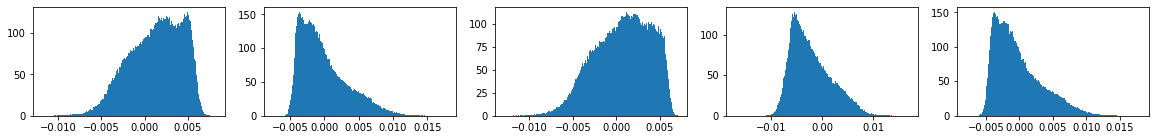

In [17]:
for sample in image_loader:
    image, target = sample['image'], sample['label']
    if cuda:
        image, target = image.cuda(), target.cuda()
    with torch.no_grad():
        output = model(image)
    break

#### M：Vegas --  D: Shanghai

0


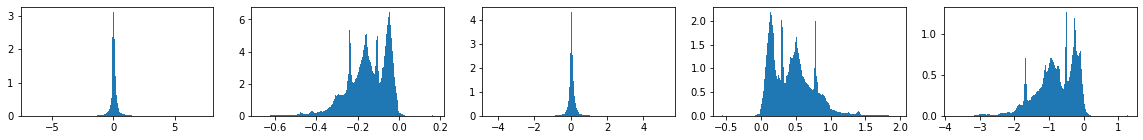

1


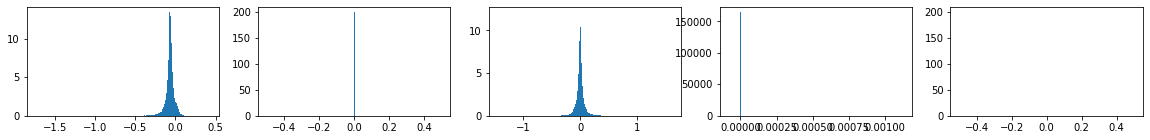

2


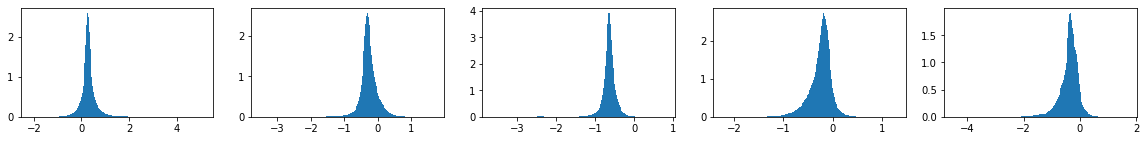

3


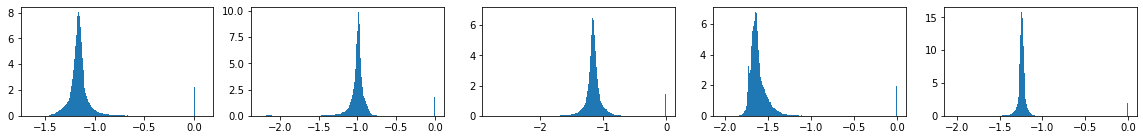

4


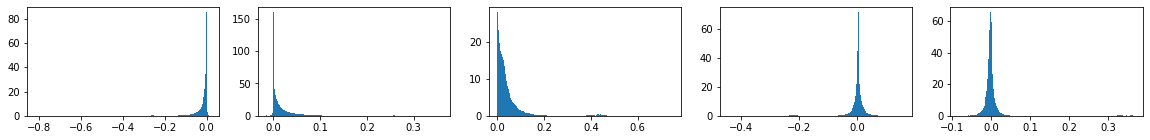

5


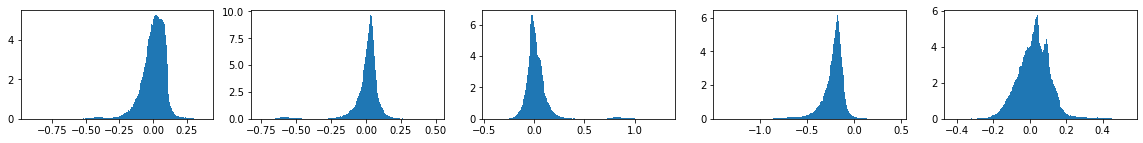

6


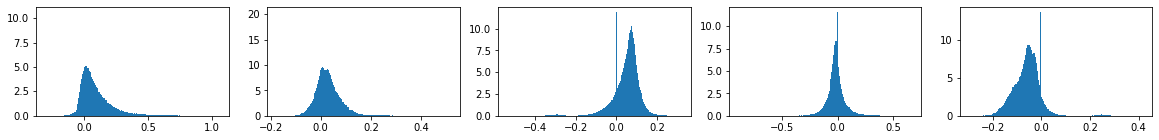

7


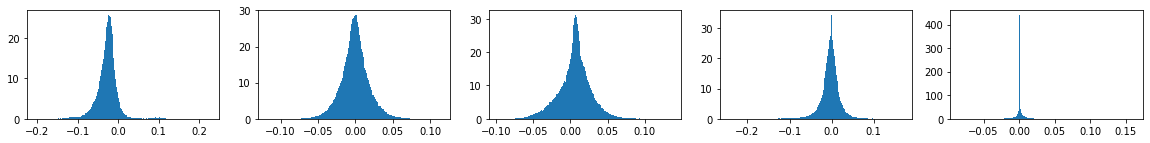

8


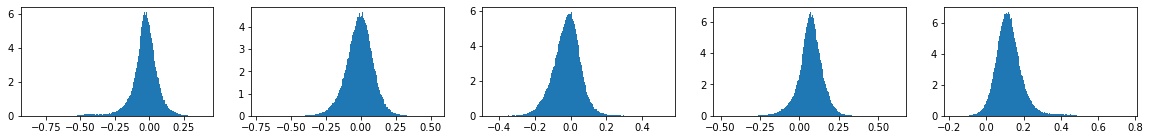

9


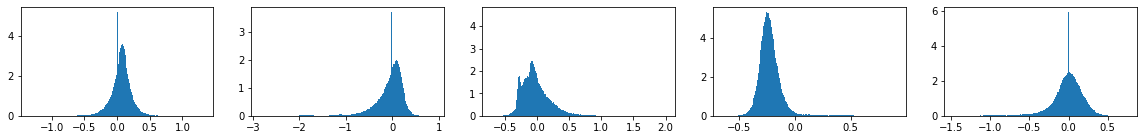

10


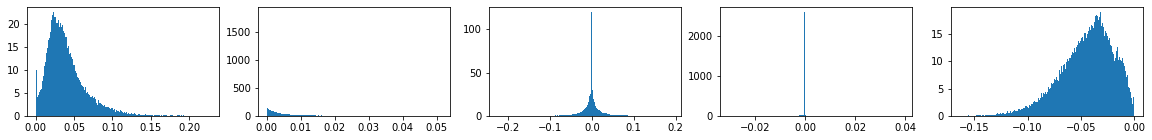

11


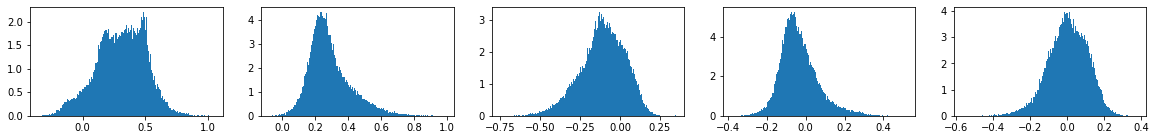

12


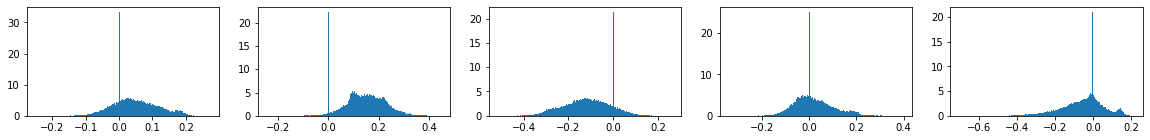

13


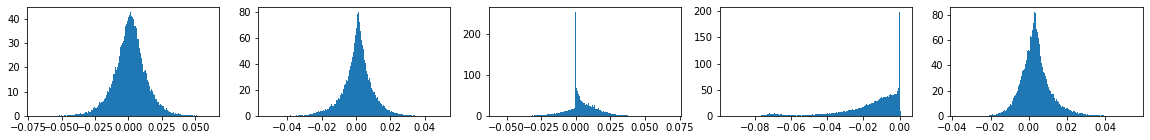

14


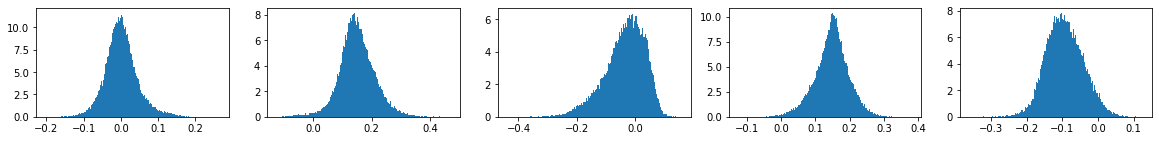

15


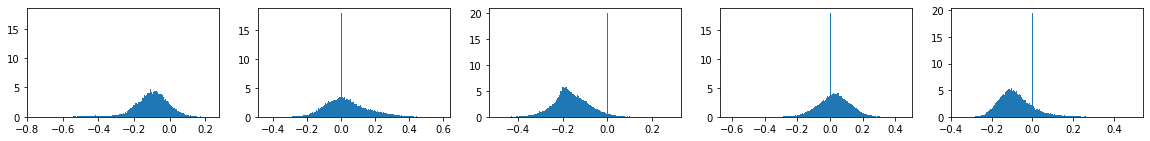

16


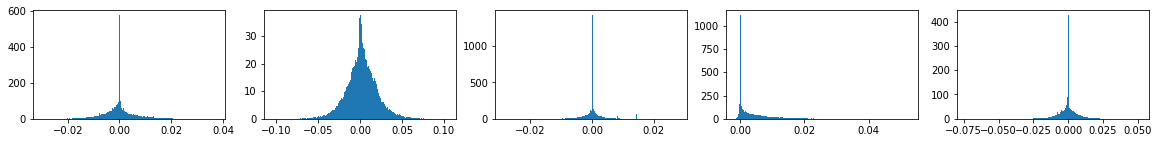

17


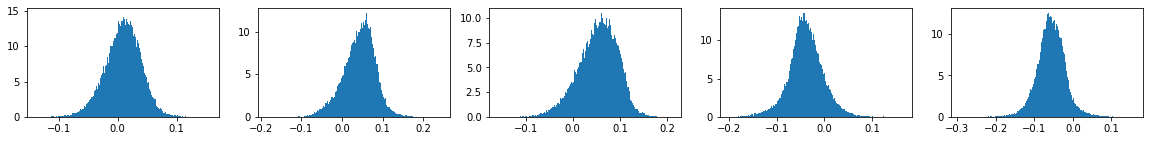

18


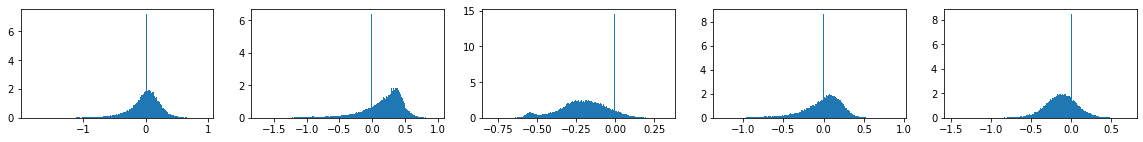

19


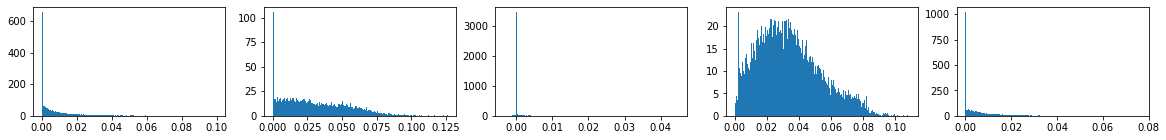

20


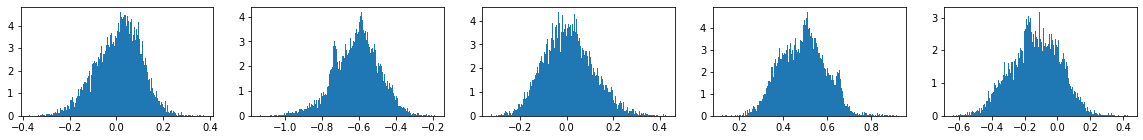

21


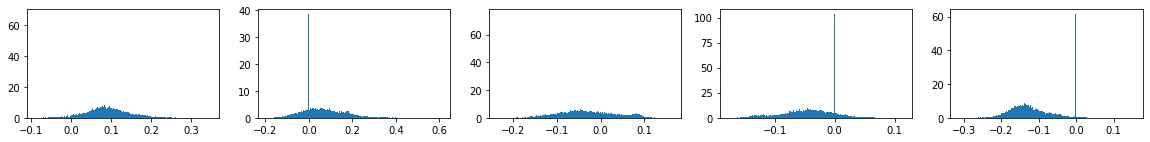

22


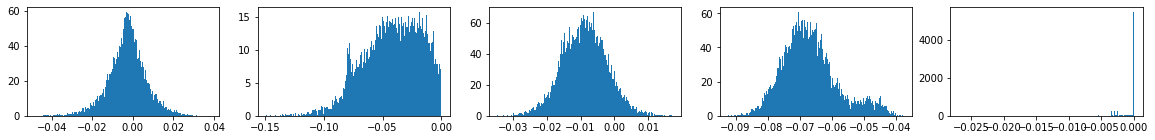

23


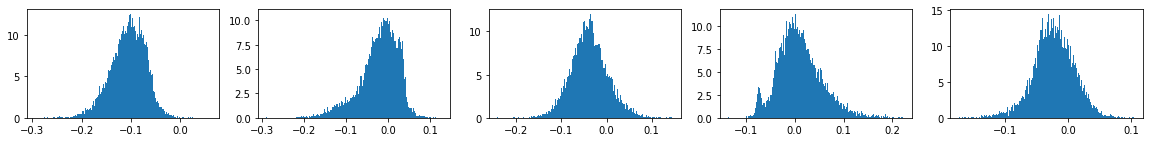

24


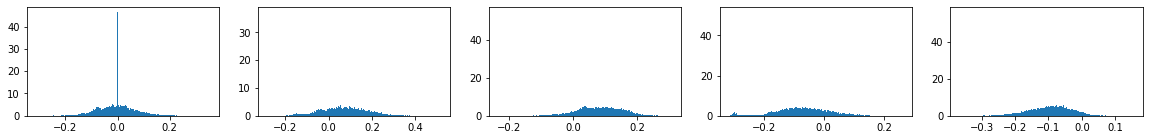

25


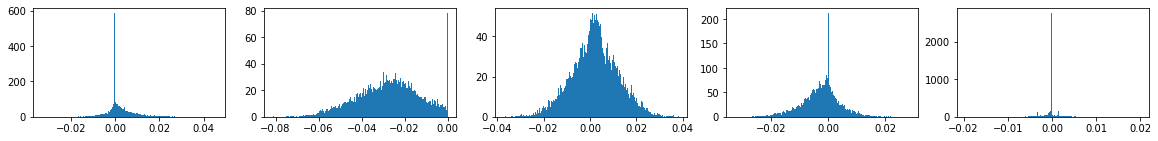

26


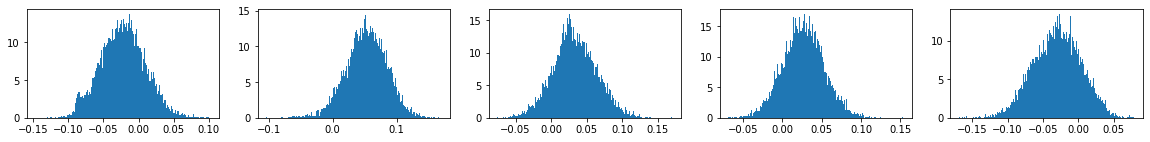

27


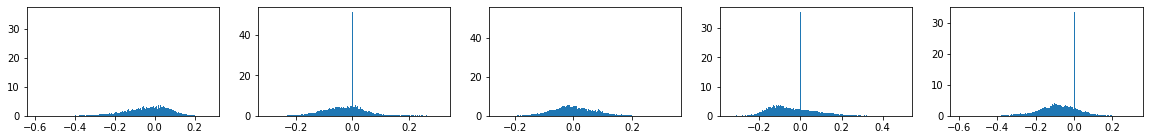

28


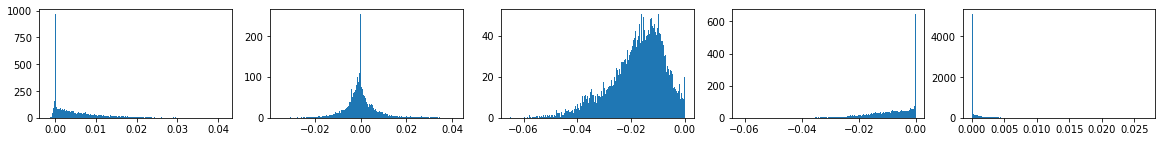

29


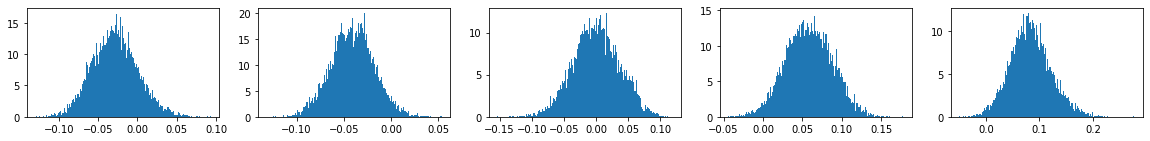

30


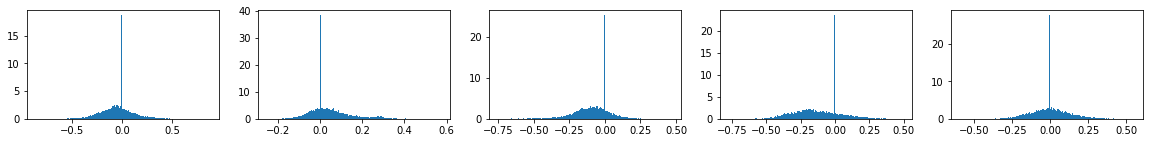

31


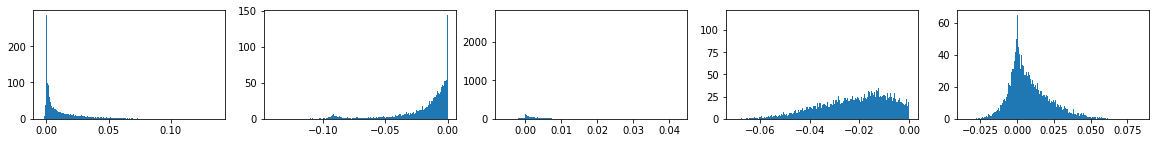

32


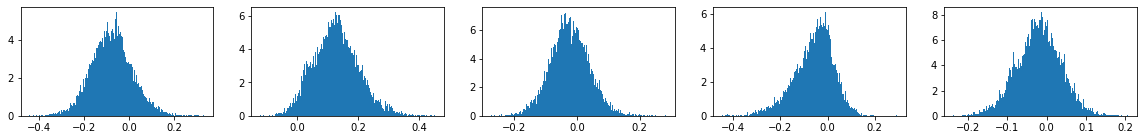

33


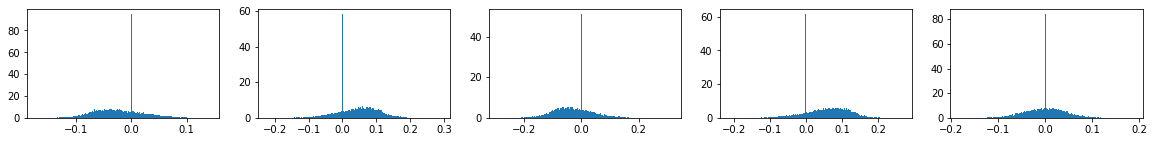

34


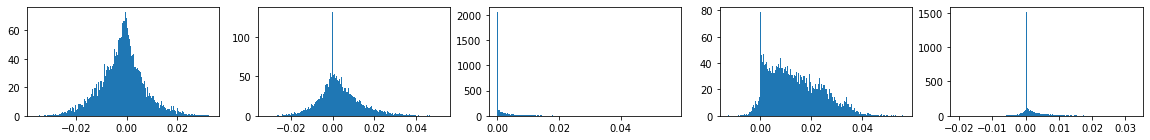

35


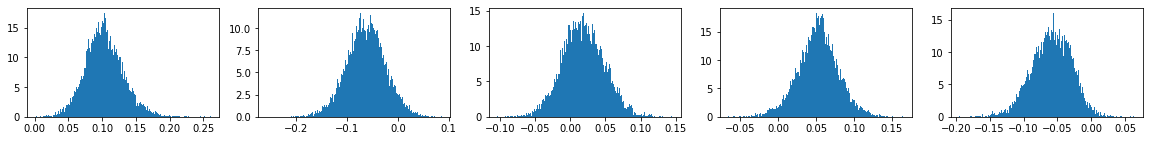

36


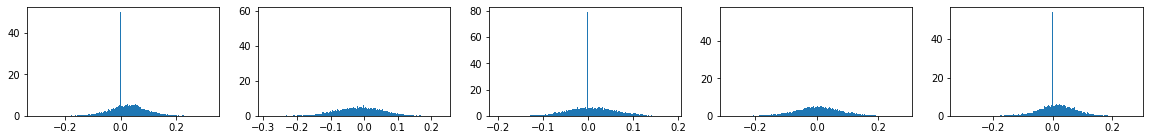

37


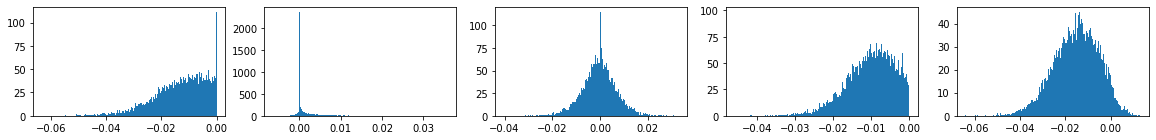

38


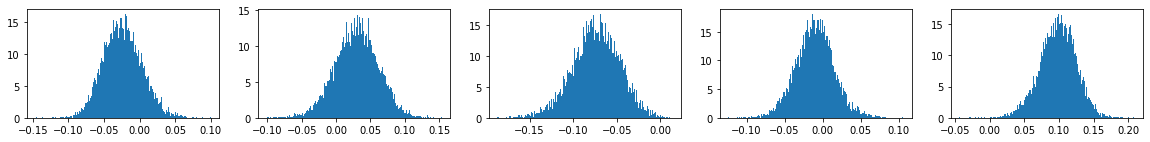

39


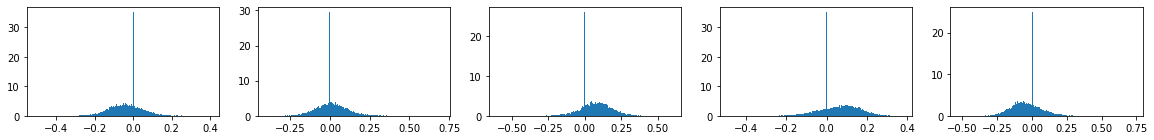

40


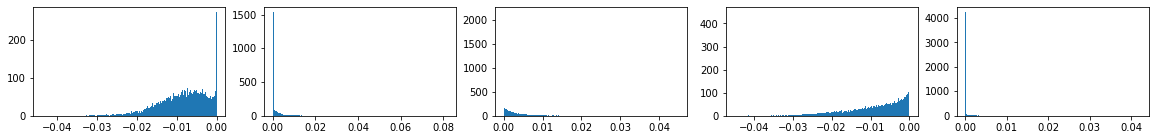

41


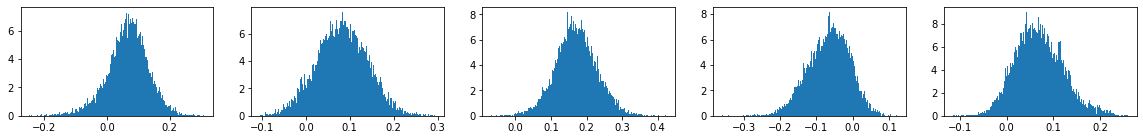

42


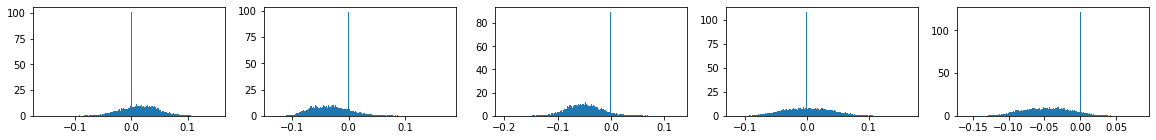

43


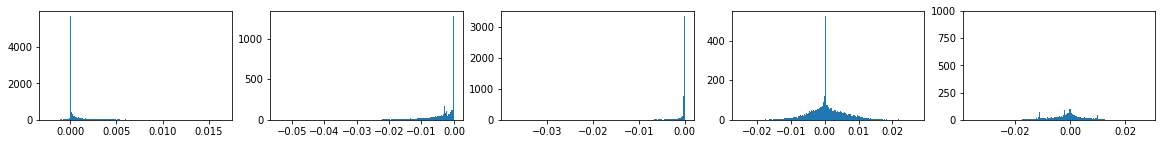

44


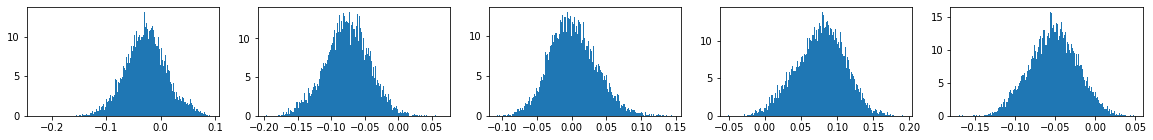

45


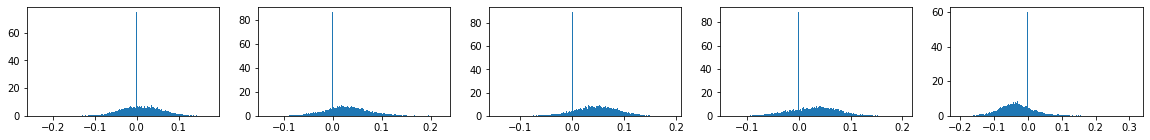

46


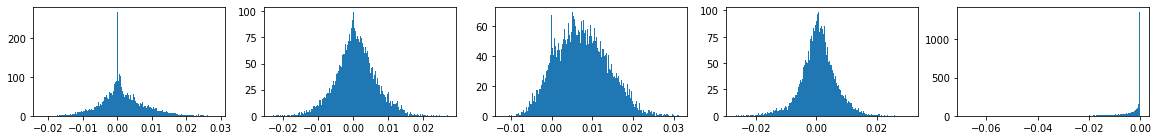

47


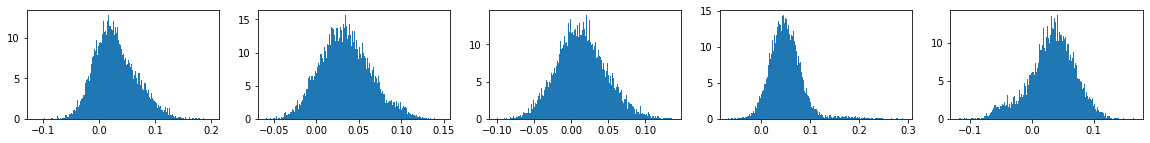

48


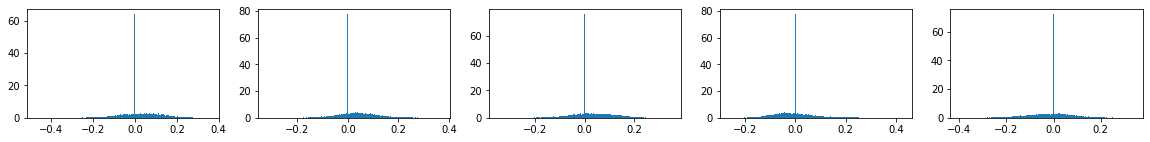

49


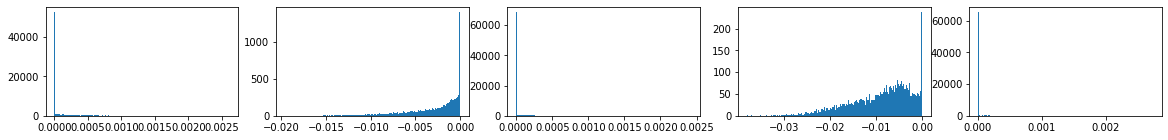

50


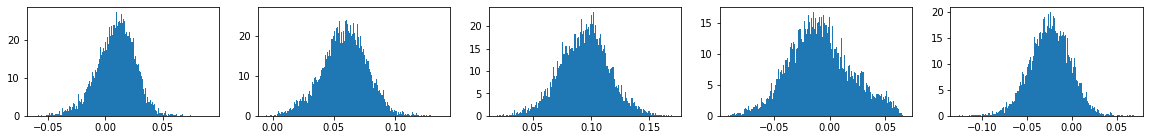

51


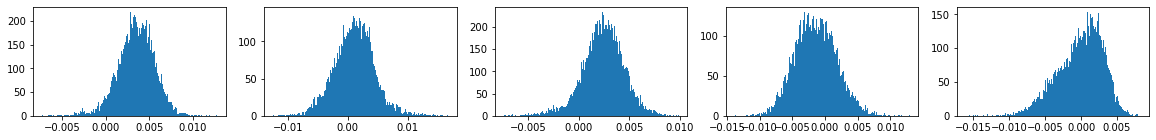

52


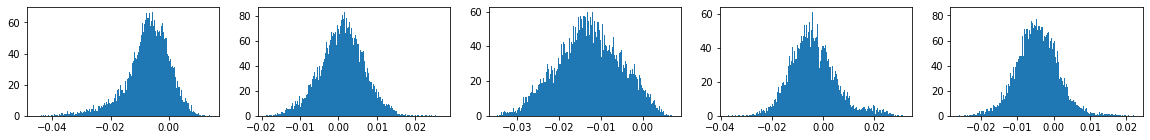

53


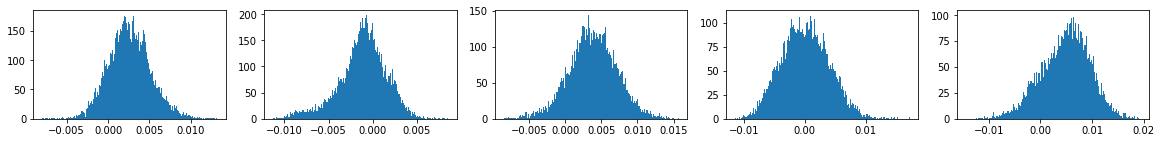

54


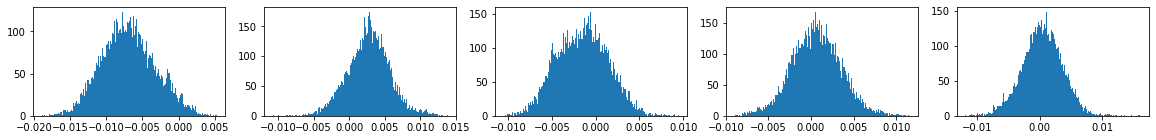

55


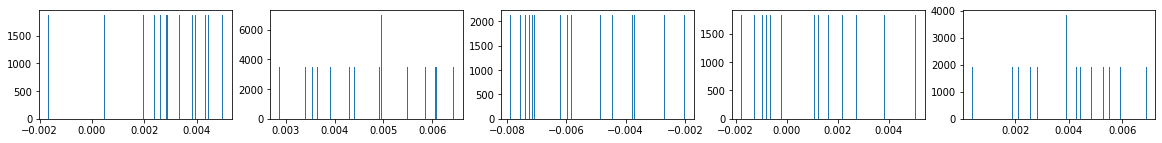

56


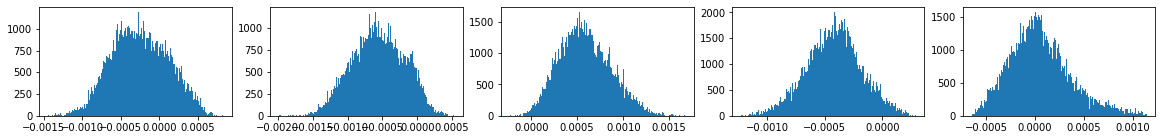

57


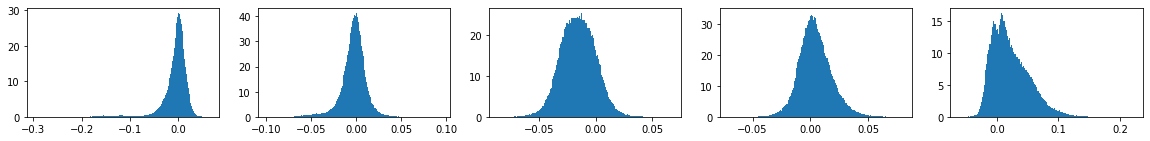

58


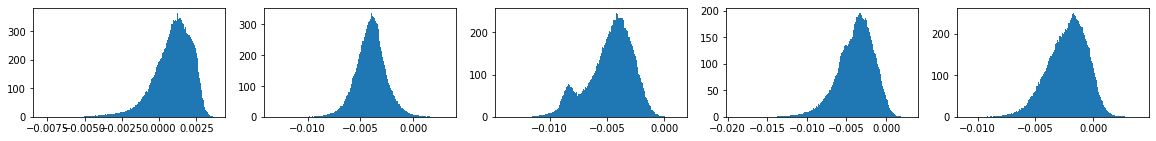

59


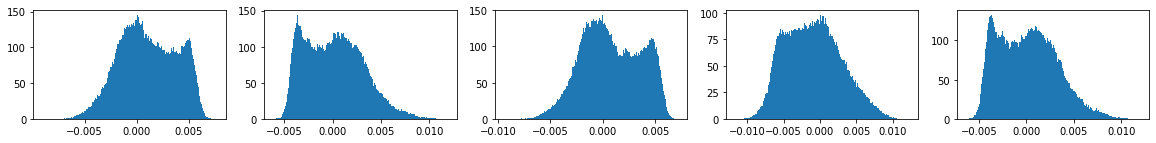

In [8]:
for sample in image_loader:
    image, target = sample['image'], sample['label']
    if cuda:
        image, target = image.cuda(), target.cuda()
    with torch.no_grad():
        output = model(image)
    break

#### test layer input to bn1 and bn2
#### M：Shanghai -- D:Shanghai

0


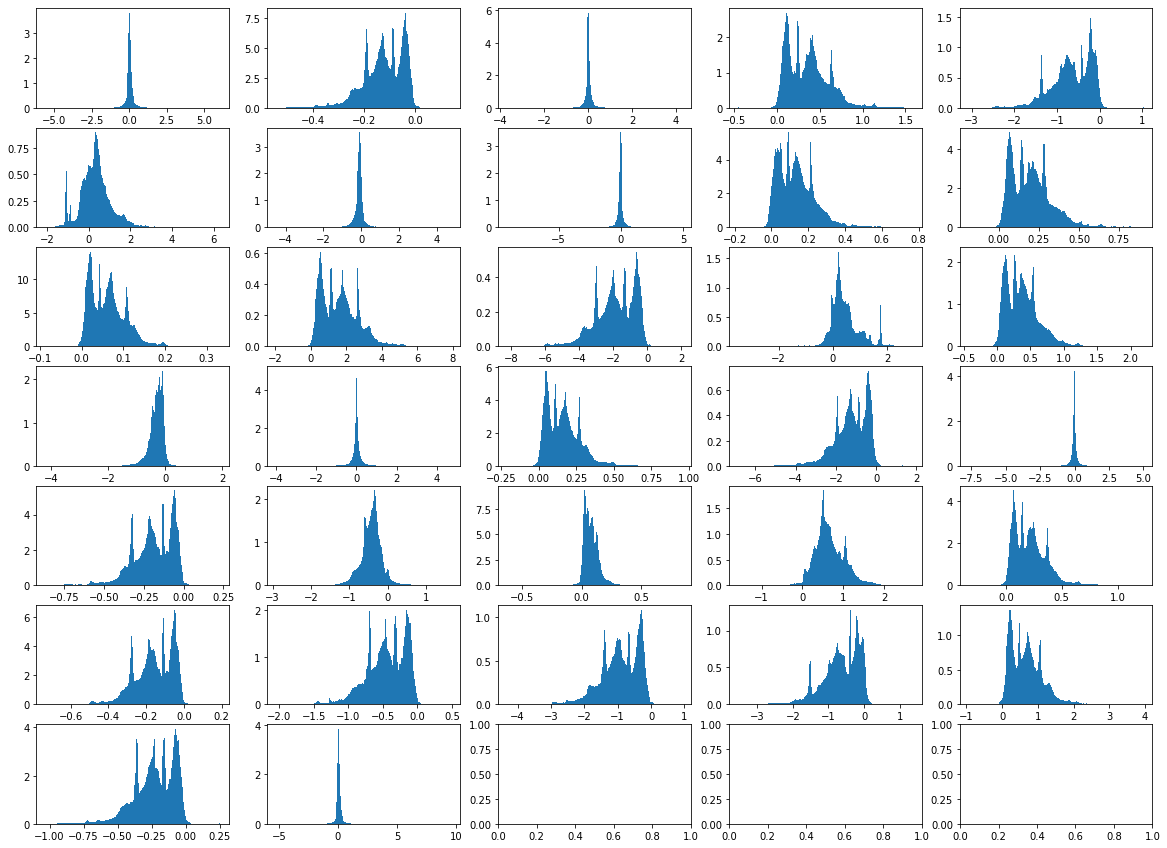

1


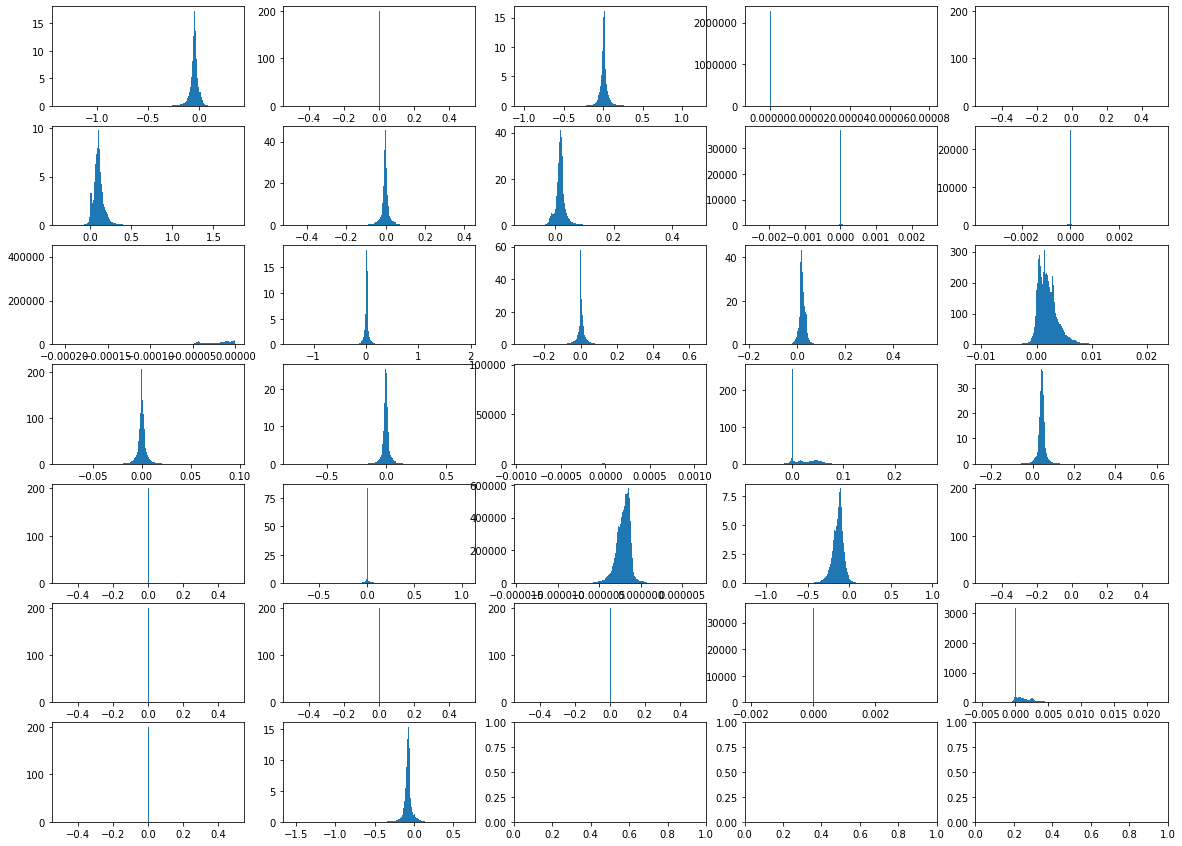

2


KeyboardInterrupt: 

In [8]:
for sample in image_loader:
    image, target = sample['image'], sample['label']
    if cuda:
        image, target = image.cuda(), target.cuda()
    with torch.no_grad():
        output = model(image)
    break

#### M: Vegas -- D: Vegas

0


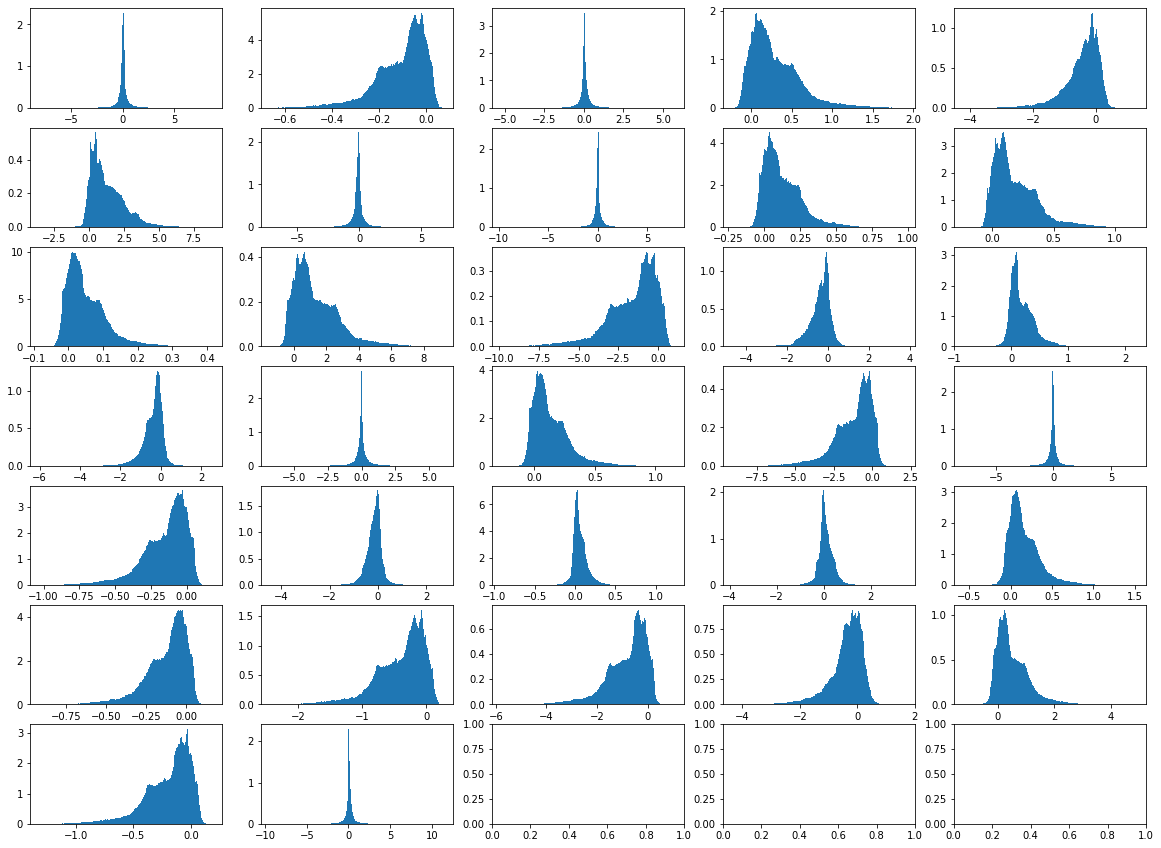

1


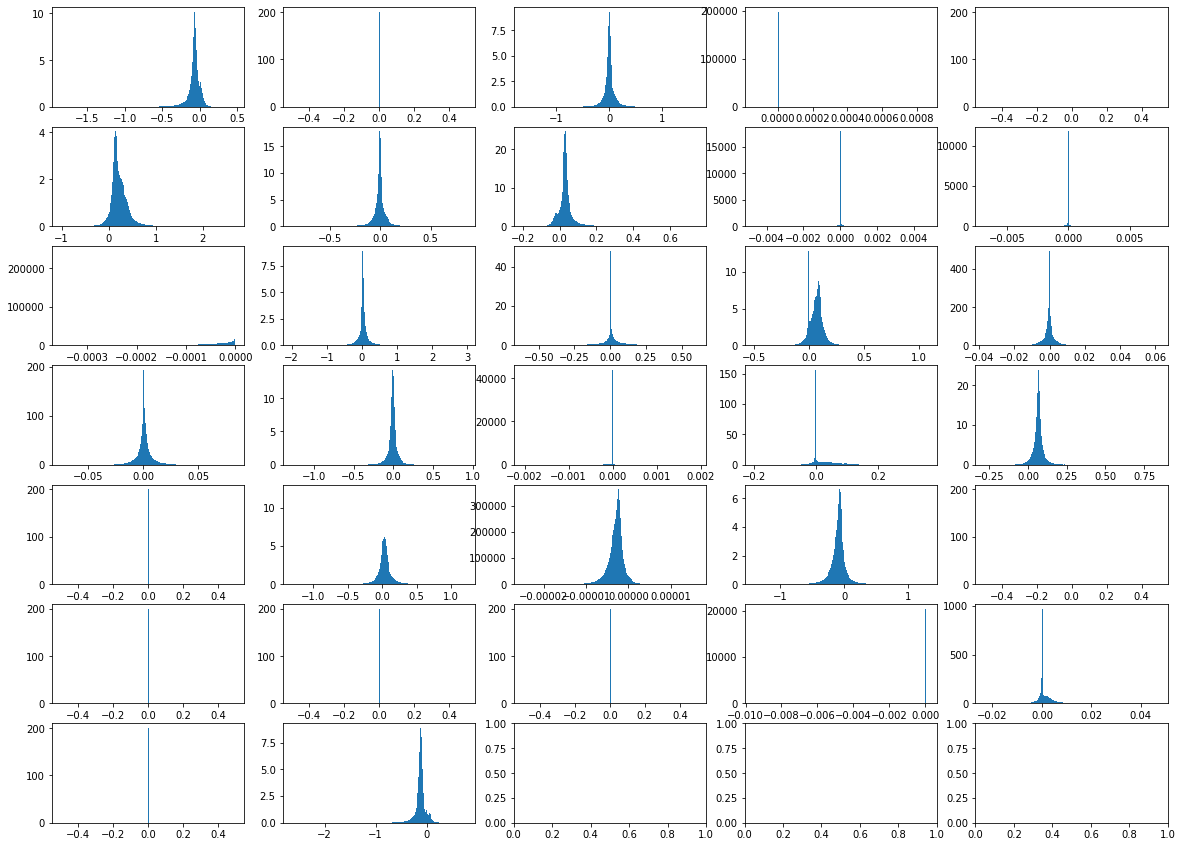

2


KeyboardInterrupt: 

In [8]:
for sample in image_loader:
    image, target = sample['image'], sample['label']
    if cuda:
        image, target = image.cuda(), target.cuda()
    with torch.no_grad():
        output = model(image)
    break

#### M: Vegas -- D: Shanghai

0


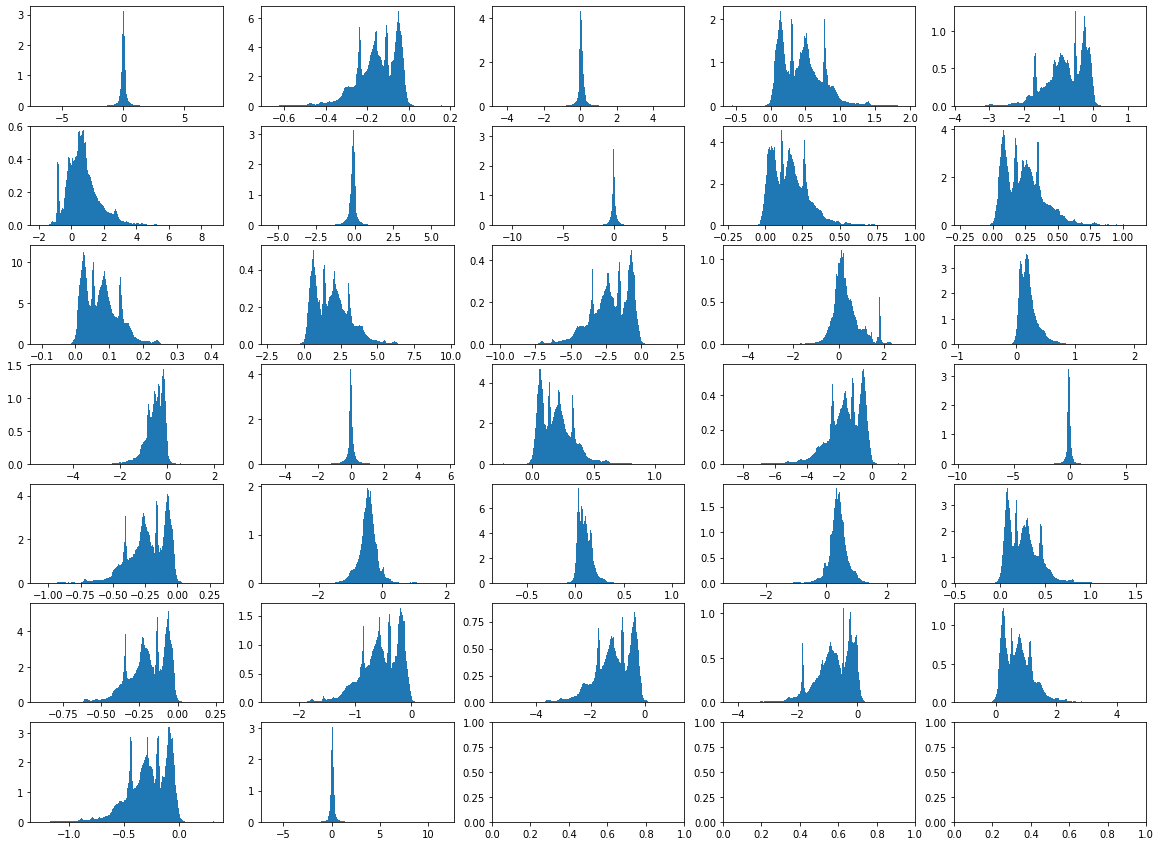

1


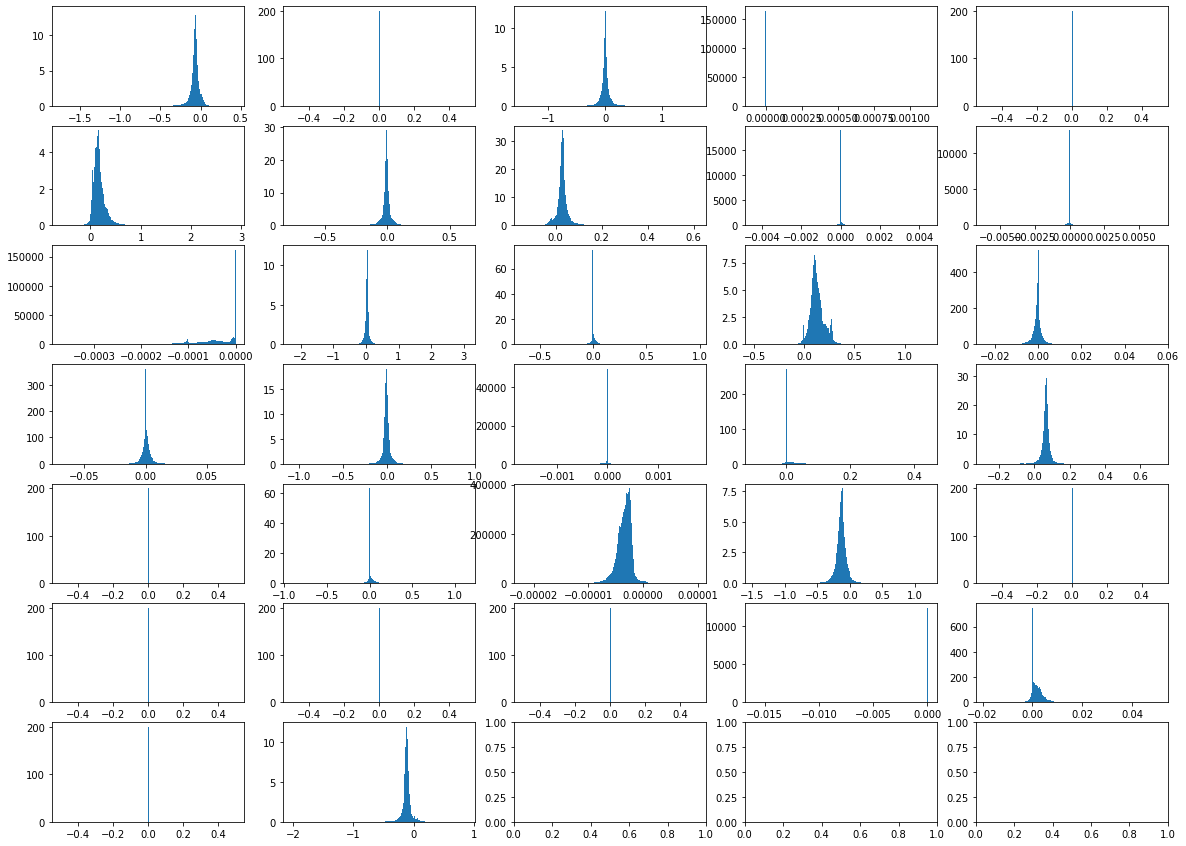

KeyboardInterrupt: 

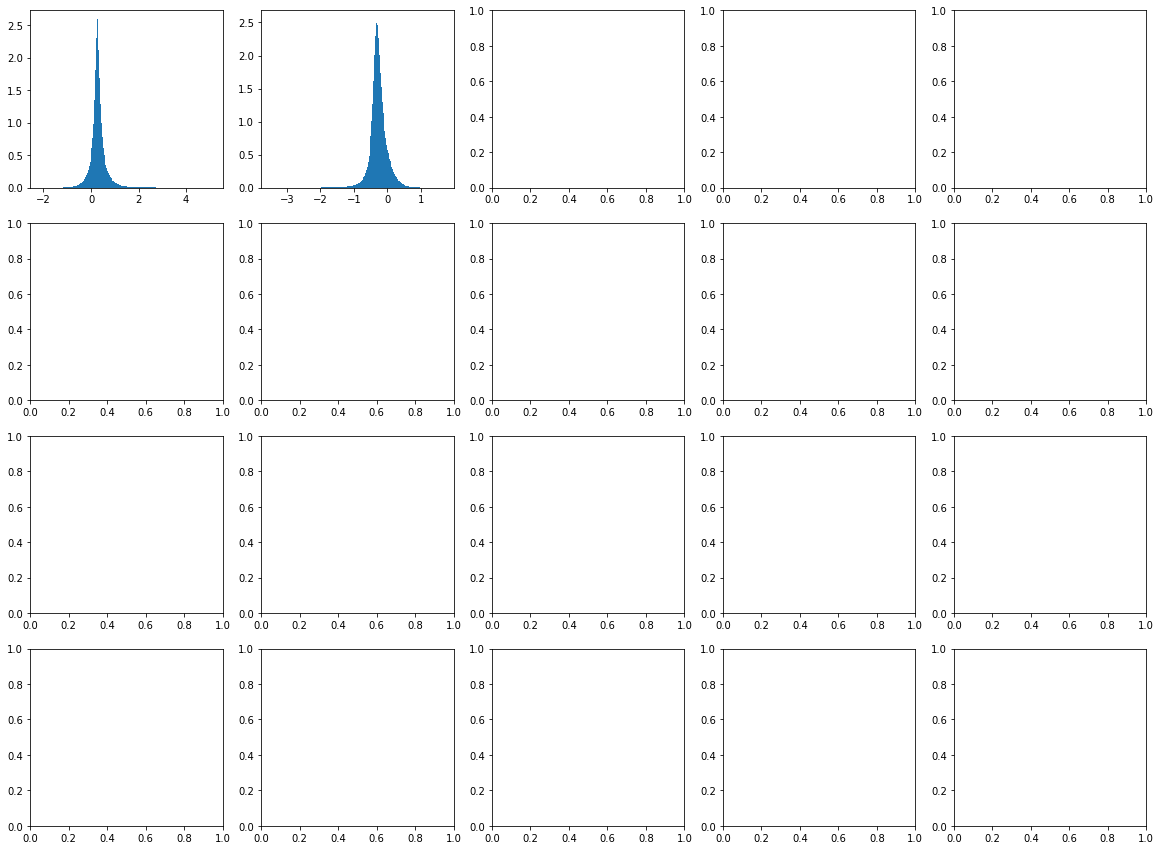

In [8]:
for sample in image_loader:
    image, target = sample['image'], sample['label']
    if cuda:
        image, target = image.cuda(), target.cuda()
    with torch.no_grad():
        output = model(image)
    break

#### tensorboard for network framework

In [ ]:
for sample in image_loader:
    image, target = sample['image'], sample['label']
    if cuda:
        image, target = image.cuda(), target.cuda()
    with torch.no_grad():
        with SummaryWriter(comment='model') as w:
            w.add_graph(model, image)
    break

#### print network framework

In [9]:
number = 0
for h in model.modules():
    print(h)
    if isinstance(h, SynchronizedBatchNorm2d) or isinstance(h, nn.BatchNorm2d):
        print(number, '------------------------------')
        number +=1

DeepLab(
  (backbone): MobileNetV2(
    (features): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
          (3): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T